The Pix2Pix GAN has been demonstrated on a range of image-to-image translation tasks such as converting maps to satellite photographs, black and white photographs to color, and sketches of products to product photographs.

And the reason why we use GAN’s for this is to synthesize these photos from one space to another.

Pix2Pix is a Generative Adversarial Network, or GAN, model designed for general purpose image-to-image translation.

# Introduction to Gan

The GAN architecture is comprised of two models:

1. Generator model for outputting new plausible synthetic images, and a

2. Discriminator model that classifies images as real (from the dataset) or fake (generated).

The discriminator model is updated directly, whereas the generator model is updated via the discriminator model. As such, the two models are trained simultaneously in an adversarial process where the generator seeks to better fool the discriminator and the discriminator seeks to better identify the counterfeit images.

### The discriminator 

The discriminator is a deep convolutional neural network that performs image classification. Specifically, conditional-image classification. It takes both the source image (e.g. satellite photo) and the target image (e.g. Google maps image) as input and predicts the likelihood of whether target image is real or a fake translation of the source image.

### The discriminator

The discriminator design is based on the effective receptive field of the model, which defines the relationship between one output of the model to the number of pixels in the input image. This is called a PatchGAN model and is carefully designed so that each output prediction of the model maps to a 70×70 square or patch of the input image. The benefit of this approach is that the same model can be applied to input images of different sizes, e.g. larger or smaller than 256×256 pixels.

# How Pix2Pix GAN works?

Pix2pix belongs to one such type called conditional GAN or CGAN.

They have some conditional settings and they learn the image-to-to mapping under this condition. Whereas, basic GAN’s generate images from a random distribution vector with no condition applied.

Steps Involved:

1. Training data pairs (x and y where x: input image and y: output image)

2. Pix2Pix uses the conditional GAN (CGAN) → G: {x, z} → y. (z → noise vector, x → input image, y → output image)

3. Generator Network (Encode- decode architecture) as an image is the input, we want to learn the deep representation and decode it and Discriminator Network (PatchGAN).

4. CGAN loss function and L1 or L2 Distance.

# Networks Architectures

### U-Net Generator

As we know the generator is an encoder-decoder network (first a series of down sampling layers then we have bottle neck layer then a series of upsampling layers)

The authors used the “U-Net” architecture with skip connections as the E-D network. The U-Net skip connections are also interesting because they do not require any resizing, projections etc. since the spatial resolution of the layers being connected already match each other.

### PatchGAN Discriminator

The discriminator network uses the PatchGAN network. instead of predicting the whole image as fake or real at the discriminator, the model takes a NxN patch image and predicts every pixel in that patch if its real or fake. The authors reason that this enforces more constraints that encourage sharp high-frequency detail. Additionally, the PatchGAN has fewer parameters and runs faster than classifying the entire image.

### Generator Loss

L1 loss which is MAE (mean absolute error) between the generated image and the target image. But, the problem was that this allows the generated image to become structurally similar to the target image.

# Library

In [45]:
from os import listdir
from numpy import asarray
from numpy import vstack
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import pix2pix_gan

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

maps
├── train
└── val

The train folder contains 1,097 images, whereas the validation dataset contains 1,099 images.

Images have a digit filename and are in JPEG format. Each image is 1,200 pixels wide and 600 pixels tall and contains both the satellite image and the Google maps image.

Each image will be loaded, rescaled, and split into the satellite and Google map elements. The result will be 1,097 color image pairs with the width and height of 256×256 pixels.

The load_images() function below implements this. It enumerates the list of images in a given directory, loads each with the target size of 256×512 pixels, splits each image into satellite and map elements and returns an array of each.

In [5]:
# load all images in a directory into memory
def load_images(path, size=(256,512)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]

## Load data

In [6]:
# dataset path
path = 'E:/gitlab/machine-learning/dataset/maps/train/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


## Load image

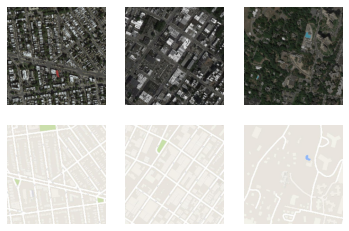

In [7]:
# plot source images
n_samples = 3
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.axis('off')
    plt.imshow(tar_images[i].astype('uint8'))
plt.show()

In [8]:
# save as compressed numpy array
filename = 'maps_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Saved dataset:  maps_256.npz


# PIX2PIX GAN

In [9]:
#load image data
dataset = pix2pix_gan.load_real_samples('maps_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)


In [10]:
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]

In [11]:
# define the models
d_model = pix2pix_gan.define_discriminator(image_shape)
g_model = pix2pix_gan.define_generator(image_shape)

In [12]:
# define the composite model
gan_model = pix2pix_gan.define_gan(g_model, d_model, image_shape)

In [13]:
# train model
pix2pix_gan.train(d_model, g_model, gan_model, dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


2021-05-09 19:36:15,043 [15536] WARNING  tensorflow:146: [JupyterRequire] AutoGraph could not transform <function train_on_batch at 0x00000287E502C5E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
> 1, d1[0.305] d2[0.881] g[63.817]
> 2, d1[0.258] d2[0.699] g[74.769]
> 3, d1[0.326] d2[0.756] g[57.038]
> 4, d1[0.342] d2[0.497] g[72.043]
> 5, d1[0.473] d2[0.402] g[53.818]
> 6, d1[0.484] d2[0.491] g[65.388]
> 7, d1[0.330] d2[0.409] g[64.788]
> 8, d1[0.419] d2[0.389] g[60.897]
> 9, d1[0.344] d2[0.464] g[48.771]
> 10, d1[0.323] d2[0.353] g[56.316]
> 11, d1[0.281] d2[0.387] g[49.077]
> 12, d1[0.291] d2[0.315] g[51.837]
> 13, d1[0.253] d2[0.306] g[47.736]
> 14, d1[0.237] d2[0.281] g[45.282]
> 15, d1[0.174] d2[0.253] g[42.815]
> 16, d1[0.304] d2[0.411] g[32.792]
> 17, d1[0.153] d2[0.274] g[29.005]
> 18, d1[0.135] d2[0.150] g[35.971]
> 19, d1[0.838] d2[1.151] g[18.491]
> 20, d1[0.126] d2[0.128] g[33.608]
> 21, d1[0.450] d2[0.158] g[29.575]
> 22, d1[0.109] d2[0.086] g[28.242]
> 23,

> 219, d1[0.021] d2[0.027] g[12.622]
> 220, d1[0.019] d2[0.011] g[14.686]
> 221, d1[0.094] d2[0.009] g[11.400]
> 222, d1[0.012] d2[0.006] g[22.992]
> 223, d1[0.025] d2[0.009] g[20.595]
> 224, d1[0.023] d2[0.014] g[8.592]
> 225, d1[0.016] d2[0.012] g[18.581]
> 226, d1[0.013] d2[0.015] g[10.549]
> 227, d1[0.018] d2[0.010] g[7.371]
> 228, d1[0.020] d2[0.007] g[8.835]
> 229, d1[0.017] d2[0.027] g[12.542]
> 230, d1[0.009] d2[0.008] g[19.182]
> 231, d1[0.032] d2[0.004] g[6.944]
> 232, d1[0.007] d2[0.005] g[16.324]
> 233, d1[0.006] d2[0.004] g[14.656]
> 234, d1[0.009] d2[0.004] g[7.704]
> 235, d1[0.010] d2[0.005] g[8.654]
> 236, d1[0.006] d2[0.004] g[14.647]
> 237, d1[0.014] d2[0.004] g[7.013]
> 238, d1[0.011] d2[0.006] g[8.165]
> 239, d1[0.009] d2[0.005] g[8.444]
> 240, d1[0.010] d2[0.006] g[7.815]
> 241, d1[0.011] d2[0.006] g[7.059]
> 242, d1[0.065] d2[0.028] g[12.485]
> 243, d1[0.014] d2[0.007] g[7.169]
> 244, d1[0.004] d2[0.006] g[13.434]
> 245, d1[0.007] d2[0.008] g[14.583]
> 246, d1[0.0

> 444, d1[0.001] d2[0.003] g[11.805]
> 445, d1[0.001] d2[0.001] g[9.576]
> 446, d1[0.006] d2[0.001] g[7.598]
> 447, d1[0.001] d2[0.002] g[10.453]
> 448, d1[0.001] d2[0.002] g[17.271]
> 449, d1[0.001] d2[0.001] g[9.106]
> 450, d1[0.001] d2[0.001] g[11.625]
> 451, d1[0.001] d2[0.001] g[7.873]
> 452, d1[0.001] d2[0.001] g[10.591]
> 453, d1[0.002] d2[0.002] g[8.650]
> 454, d1[0.008] d2[0.003] g[6.797]
> 455, d1[0.005] d2[0.001] g[7.361]
> 456, d1[0.001] d2[0.001] g[7.931]
> 457, d1[0.001] d2[0.001] g[8.336]
> 458, d1[0.001] d2[0.001] g[6.423]
> 459, d1[0.001] d2[0.002] g[8.961]
> 460, d1[0.001] d2[0.001] g[7.574]
> 461, d1[0.002] d2[0.002] g[7.006]
> 462, d1[0.002] d2[0.001] g[8.113]
> 463, d1[0.001] d2[0.001] g[8.157]
> 464, d1[0.001] d2[0.001] g[18.261]
> 465, d1[0.001] d2[0.001] g[10.274]
> 466, d1[0.002] d2[0.003] g[11.770]
> 467, d1[0.002] d2[0.001] g[8.639]
> 468, d1[0.005] d2[0.001] g[6.826]
> 469, d1[0.004] d2[0.001] g[7.016]
> 470, d1[0.001] d2[0.001] g[11.572]
> 471, d1[0.001] d2

> 669, d1[0.370] d2[0.126] g[12.955]
> 670, d1[0.483] d2[0.177] g[20.441]
> 671, d1[0.135] d2[0.330] g[19.152]
> 672, d1[0.005] d2[0.175] g[11.968]
> 673, d1[0.018] d2[0.108] g[11.709]
> 674, d1[0.997] d2[0.117] g[19.274]
> 675, d1[0.159] d2[0.354] g[10.588]
> 676, d1[0.367] d2[0.256] g[18.316]
> 677, d1[0.035] d2[0.151] g[13.263]
> 678, d1[0.781] d2[0.230] g[7.330]
> 679, d1[0.009] d2[0.146] g[18.727]
> 680, d1[0.362] d2[0.134] g[8.035]
> 681, d1[0.008] d2[0.181] g[11.637]
> 682, d1[0.145] d2[0.177] g[8.975]
> 683, d1[0.244] d2[0.112] g[6.910]
> 684, d1[0.012] d2[0.088] g[9.936]
> 685, d1[0.083] d2[0.082] g[6.109]
> 686, d1[0.487] d2[0.089] g[7.291]
> 687, d1[0.011] d2[0.271] g[6.918]
> 688, d1[0.027] d2[0.473] g[14.647]
> 689, d1[0.009] d2[0.029] g[20.228]
> 690, d1[1.607] d2[0.053] g[11.040]
> 691, d1[0.187] d2[0.085] g[10.548]
> 692, d1[0.840] d2[0.177] g[6.396]
> 693, d1[0.011] d2[0.203] g[11.473]
> 694, d1[0.299] d2[0.412] g[6.834]
> 695, d1[0.650] d2[0.182] g[11.367]
> 696, d1[0

> 894, d1[0.011] d2[0.085] g[10.328]
> 895, d1[0.006] d2[0.005] g[9.977]
> 896, d1[0.007] d2[0.043] g[13.040]
> 897, d1[0.009] d2[0.410] g[11.798]
> 898, d1[0.422] d2[0.110] g[7.469]
> 899, d1[0.299] d2[0.053] g[6.377]
> 900, d1[0.011] d2[0.022] g[7.946]
> 901, d1[0.116] d2[0.065] g[7.211]
> 902, d1[0.014] d2[0.010] g[7.572]
> 903, d1[0.008] d2[0.025] g[8.264]
> 904, d1[0.005] d2[0.056] g[13.078]
> 905, d1[0.066] d2[0.032] g[6.981]
> 906, d1[0.007] d2[0.015] g[9.074]
> 907, d1[0.018] d2[0.030] g[18.487]
> 908, d1[0.008] d2[0.059] g[7.749]
> 909, d1[0.012] d2[0.005] g[10.955]
> 910, d1[0.007] d2[0.011] g[11.511]
> 911, d1[0.021] d2[0.009] g[9.888]
> 912, d1[0.008] d2[0.007] g[9.435]
> 913, d1[0.332] d2[0.740] g[6.925]
> 914, d1[0.208] d2[0.013] g[6.913]
> 915, d1[0.264] d2[0.197] g[7.080]
> 916, d1[0.008] d2[0.004] g[17.403]
> 917, d1[0.005] d2[0.005] g[15.532]
> 918, d1[0.007] d2[0.003] g[8.919]
> 919, d1[0.010] d2[0.005] g[8.165]
> 920, d1[0.087] d2[0.090] g[9.669]
> 921, d1[0.090] d2

> 1116, d1[0.004] d2[0.007] g[7.237]
> 1117, d1[0.000] d2[0.011] g[13.038]
> 1118, d1[0.007] d2[0.005] g[6.317]
> 1119, d1[0.002] d2[0.005] g[11.138]
> 1120, d1[0.001] d2[0.005] g[12.360]
> 1121, d1[0.009] d2[0.020] g[6.700]
> 1122, d1[0.006] d2[0.015] g[7.886]
> 1123, d1[0.002] d2[0.010] g[17.759]
> 1124, d1[0.001] d2[0.014] g[7.530]
> 1125, d1[0.001] d2[0.006] g[10.449]
> 1126, d1[0.007] d2[0.075] g[7.726]
> 1127, d1[0.001] d2[0.002] g[13.770]
> 1128, d1[0.001] d2[0.002] g[11.590]
> 1129, d1[0.098] d2[0.002] g[9.333]
> 1130, d1[0.019] d2[0.004] g[9.380]
> 1131, d1[0.003] d2[0.019] g[9.165]
> 1132, d1[0.029] d2[0.031] g[8.872]
> 1133, d1[0.001] d2[0.009] g[9.844]
> 1134, d1[0.020] d2[0.114] g[8.145]
> 1135, d1[0.263] d2[0.869] g[6.061]
> 1136, d1[0.119] d2[0.002] g[12.740]
> 1137, d1[0.068] d2[0.166] g[8.872]
> 1138, d1[0.098] d2[0.003] g[15.868]
> 1139, d1[0.027] d2[0.001] g[14.259]
> 1140, d1[0.027] d2[0.002] g[14.435]
> 1141, d1[0.055] d2[0.002] g[9.160]
> 1142, d1[0.002] d2[0.005]

> 1335, d1[0.002] d2[0.001] g[7.464]
> 1336, d1[0.006] d2[0.001] g[7.209]
> 1337, d1[0.000] d2[0.010] g[8.877]
> 1338, d1[0.001] d2[0.002] g[8.541]
> 1339, d1[0.000] d2[0.002] g[10.783]
> 1340, d1[0.003] d2[0.002] g[5.891]
> 1341, d1[0.007] d2[0.001] g[5.649]
> 1342, d1[0.017] d2[0.023] g[7.061]
> 1343, d1[0.002] d2[0.001] g[9.056]
> 1344, d1[0.005] d2[0.001] g[7.571]
> 1345, d1[0.002] d2[0.002] g[6.731]
> 1346, d1[0.007] d2[0.001] g[9.069]
> 1347, d1[0.000] d2[0.002] g[10.584]
> 1348, d1[0.001] d2[0.001] g[19.243]
> 1349, d1[0.001] d2[0.002] g[7.594]
> 1350, d1[0.000] d2[0.002] g[14.810]
> 1351, d1[0.000] d2[0.002] g[15.147]
> 1352, d1[0.016] d2[0.001] g[7.973]
> 1353, d1[0.002] d2[0.003] g[7.452]
> 1354, d1[0.000] d2[0.002] g[28.378]
> 1355, d1[0.008] d2[0.003] g[7.612]
> 1356, d1[0.000] d2[0.002] g[10.716]
> 1357, d1[0.001] d2[0.002] g[9.361]
> 1358, d1[0.005] d2[0.002] g[19.852]
> 1359, d1[0.000] d2[0.003] g[9.256]
> 1360, d1[0.009] d2[0.002] g[7.689]
> 1361, d1[0.000] d2[0.004] g[

> 1555, d1[0.127] d2[0.010] g[7.246]
> 1556, d1[0.744] d2[0.083] g[6.212]
> 1557, d1[0.006] d2[0.490] g[8.062]
> 1558, d1[0.008] d2[0.005] g[15.973]
> 1559, d1[0.005] d2[0.005] g[10.780]
> 1560, d1[0.035] d2[0.003] g[7.373]
> 1561, d1[0.016] d2[0.006] g[8.710]
> 1562, d1[0.032] d2[0.001] g[7.480]
> 1563, d1[0.020] d2[0.004] g[8.692]
> 1564, d1[0.003] d2[0.003] g[8.903]
> 1565, d1[0.004] d2[0.004] g[24.192]
> 1566, d1[0.007] d2[0.065] g[11.730]
> 1567, d1[0.055] d2[0.003] g[7.064]
> 1568, d1[0.003] d2[0.003] g[10.650]
> 1569, d1[0.024] d2[0.005] g[6.635]
> 1570, d1[0.010] d2[0.008] g[14.227]
> 1571, d1[0.006] d2[0.023] g[10.574]
> 1572, d1[0.006] d2[0.004] g[6.364]
> 1573, d1[0.003] d2[0.007] g[11.248]
> 1574, d1[0.008] d2[0.003] g[6.837]
> 1575, d1[0.011] d2[0.005] g[7.169]
> 1576, d1[0.002] d2[0.003] g[11.261]
> 1577, d1[0.006] d2[0.006] g[11.421]
> 1578, d1[0.002] d2[0.004] g[10.898]
> 1579, d1[0.006] d2[0.002] g[21.372]
> 1580, d1[0.001] d2[0.002] g[10.937]
> 1581, d1[0.016] d2[0.00

> 1775, d1[0.006] d2[0.002] g[7.335]
> 1776, d1[0.002] d2[0.001] g[8.634]
> 1777, d1[0.001] d2[0.002] g[11.043]
> 1778, d1[0.003] d2[0.003] g[14.265]
> 1779, d1[0.002] d2[0.002] g[10.038]
> 1780, d1[0.002] d2[0.003] g[9.338]
> 1781, d1[0.002] d2[0.002] g[11.267]
> 1782, d1[0.050] d2[0.001] g[7.593]
> 1783, d1[0.011] d2[0.002] g[6.904]
> 1784, d1[0.002] d2[0.001] g[18.659]
> 1785, d1[0.009] d2[0.002] g[6.508]
> 1786, d1[0.000] d2[0.001] g[17.070]
> 1787, d1[0.023] d2[0.001] g[4.970]
> 1788, d1[0.001] d2[0.004] g[8.132]
> 1789, d1[0.006] d2[0.002] g[6.438]
> 1790, d1[0.001] d2[0.019] g[11.043]
> 1791, d1[0.014] d2[0.001] g[7.359]
> 1792, d1[0.005] d2[0.001] g[7.136]
> 1793, d1[0.000] d2[0.001] g[11.728]
> 1794, d1[0.001] d2[0.001] g[8.345]
> 1795, d1[0.001] d2[0.001] g[8.270]
> 1796, d1[0.004] d2[0.001] g[6.744]
> 1797, d1[0.007] d2[0.002] g[8.594]
> 1798, d1[0.000] d2[0.001] g[10.173]
> 1799, d1[0.000] d2[0.000] g[9.960]
> 1800, d1[0.007] d2[0.001] g[7.912]
> 1801, d1[0.001] d2[0.001] g

> 1994, d1[0.001] d2[0.000] g[7.078]
> 1995, d1[0.001] d2[0.000] g[17.302]
> 1996, d1[0.000] d2[0.000] g[6.971]
> 1997, d1[0.000] d2[0.001] g[18.696]
> 1998, d1[0.001] d2[0.000] g[6.591]
> 1999, d1[0.002] d2[0.000] g[8.576]
> 2000, d1[0.000] d2[0.001] g[16.150]
> 2001, d1[0.000] d2[0.001] g[7.184]
> 2002, d1[0.000] d2[0.001] g[8.827]
> 2003, d1[0.000] d2[0.001] g[13.558]
> 2004, d1[0.001] d2[0.001] g[5.981]
> 2005, d1[0.001] d2[0.001] g[8.840]
> 2006, d1[0.000] d2[0.000] g[9.713]
> 2007, d1[0.001] d2[0.000] g[16.906]
> 2008, d1[0.000] d2[0.000] g[7.429]
> 2009, d1[0.000] d2[0.000] g[7.243]
> 2010, d1[0.001] d2[0.000] g[6.108]
> 2011, d1[0.000] d2[0.000] g[9.365]
> 2012, d1[0.001] d2[0.000] g[12.212]
> 2013, d1[0.002] d2[0.001] g[7.864]
> 2014, d1[0.000] d2[0.001] g[11.357]
> 2015, d1[0.000] d2[0.001] g[8.588]
> 2016, d1[0.000] d2[0.001] g[10.944]
> 2017, d1[0.000] d2[0.001] g[7.110]
> 2018, d1[0.000] d2[0.017] g[9.864]
> 2019, d1[0.001] d2[0.003] g[8.283]
> 2020, d1[0.001] d2[0.000] g[

> 2214, d1[0.002] d2[0.001] g[8.275]
> 2215, d1[0.001] d2[0.001] g[8.682]
> 2216, d1[0.001] d2[0.001] g[18.566]
> 2217, d1[0.002] d2[0.001] g[4.689]
> 2218, d1[0.001] d2[0.000] g[9.763]
> 2219, d1[0.053] d2[0.001] g[10.686]
> 2220, d1[0.001] d2[0.003] g[17.978]
> 2221, d1[0.005] d2[0.001] g[6.558]
> 2222, d1[0.001] d2[0.002] g[14.105]
> 2223, d1[0.000] d2[0.001] g[7.587]
> 2224, d1[0.002] d2[0.068] g[9.913]
> 2225, d1[0.023] d2[0.001] g[5.903]
> 2226, d1[0.001] d2[0.002] g[7.635]
> 2227, d1[0.001] d2[0.001] g[5.671]
> 2228, d1[0.001] d2[0.001] g[10.964]
> 2229, d1[0.004] d2[0.001] g[19.648]
> 2230, d1[0.001] d2[0.001] g[7.033]
> 2231, d1[0.000] d2[0.001] g[10.148]
> 2232, d1[0.003] d2[0.001] g[24.353]
> 2233, d1[0.001] d2[0.001] g[11.916]
> 2234, d1[0.004] d2[0.001] g[7.898]
> 2235, d1[0.002] d2[0.001] g[6.942]
> 2236, d1[0.000] d2[0.003] g[15.032]
> 2237, d1[0.001] d2[0.002] g[9.763]
> 2238, d1[0.003] d2[0.001] g[6.394]
> 2239, d1[0.000] d2[0.002] g[17.671]
> 2240, d1[0.003] d2[0.001]

> 2433, d1[0.003] d2[0.001] g[8.281]
> 2434, d1[0.001] d2[0.002] g[12.756]
> 2435, d1[0.003] d2[0.001] g[7.730]
> 2436, d1[0.001] d2[0.001] g[7.719]
> 2437, d1[0.003] d2[0.001] g[7.001]
> 2438, d1[0.001] d2[0.001] g[6.981]
> 2439, d1[0.002] d2[0.001] g[8.097]
> 2440, d1[0.002] d2[0.003] g[7.380]
> 2441, d1[0.020] d2[0.064] g[10.770]
> 2442, d1[0.003] d2[0.001] g[23.778]
> 2443, d1[0.002] d2[0.002] g[22.532]
> 2444, d1[0.039] d2[0.010] g[8.649]
> 2445, d1[0.008] d2[0.000] g[7.394]
> 2446, d1[0.001] d2[0.018] g[15.585]
> 2447, d1[0.002] d2[0.001] g[8.395]
> 2448, d1[0.002] d2[0.001] g[7.316]
> 2449, d1[0.003] d2[0.024] g[15.001]
> 2450, d1[0.035] d2[0.076] g[8.672]
> 2451, d1[0.001] d2[0.001] g[10.864]
> 2452, d1[0.002] d2[0.005] g[11.129]
> 2453, d1[0.002] d2[0.005] g[10.023]
> 2454, d1[0.004] d2[0.003] g[12.135]
> 2455, d1[0.101] d2[0.003] g[6.956]
> 2456, d1[0.020] d2[0.973] g[9.264]
> 2457, d1[0.024] d2[0.121] g[22.143]
> 2458, d1[0.634] d2[0.469] g[17.270]
> 2459, d1[0.358] d2[0.001

> 2652, d1[0.000] d2[0.000] g[9.117]
> 2653, d1[0.001] d2[0.001] g[7.421]
> 2654, d1[0.001] d2[0.000] g[10.561]
> 2655, d1[0.000] d2[0.000] g[7.370]
> 2656, d1[0.001] d2[0.000] g[6.454]
> 2657, d1[0.000] d2[0.000] g[9.552]
> 2658, d1[0.000] d2[0.000] g[12.957]
> 2659, d1[0.001] d2[0.001] g[6.384]
> 2660, d1[0.000] d2[0.000] g[13.520]
> 2661, d1[0.000] d2[0.000] g[8.142]
> 2662, d1[0.000] d2[0.000] g[15.031]
> 2663, d1[0.001] d2[0.000] g[7.297]
> 2664, d1[0.000] d2[0.000] g[8.758]
> 2665, d1[0.005] d2[0.000] g[6.492]
> 2666, d1[0.000] d2[0.000] g[8.738]
> 2667, d1[0.000] d2[0.000] g[11.813]
> 2668, d1[0.000] d2[0.000] g[14.653]
> 2669, d1[0.001] d2[0.000] g[6.043]
> 2670, d1[0.000] d2[0.000] g[17.958]
> 2671, d1[0.000] d2[0.000] g[10.736]
> 2672, d1[0.000] d2[0.000] g[11.116]
> 2673, d1[0.001] d2[0.000] g[7.669]
> 2674, d1[0.000] d2[0.000] g[8.433]
> 2675, d1[0.000] d2[0.001] g[8.692]
> 2676, d1[0.000] d2[0.000] g[7.306]
> 2677, d1[0.002] d2[0.000] g[18.156]
> 2678, d1[0.000] d2[0.001] 

> 2872, d1[0.001] d2[0.002] g[8.232]
> 2873, d1[0.000] d2[0.009] g[12.556]
> 2874, d1[0.018] d2[0.028] g[7.322]
> 2875, d1[0.000] d2[0.002] g[9.770]
> 2876, d1[0.000] d2[0.001] g[13.259]
> 2877, d1[0.002] d2[0.019] g[11.744]
> 2878, d1[0.004] d2[0.054] g[6.169]
> 2879, d1[0.003] d2[0.001] g[10.387]
> 2880, d1[0.066] d2[0.001] g[7.885]
> 2881, d1[0.005] d2[0.002] g[6.744]
> 2882, d1[0.001] d2[0.044] g[7.668]
> 2883, d1[0.001] d2[0.017] g[8.295]
> 2884, d1[0.001] d2[0.024] g[10.596]
> 2885, d1[0.077] d2[0.010] g[6.496]
> 2886, d1[0.001] d2[0.060] g[12.054]
> 2887, d1[0.001] d2[0.018] g[8.431]
> 2888, d1[0.024] d2[0.002] g[6.906]
> 2889, d1[0.003] d2[0.027] g[11.595]
> 2890, d1[1.089] d2[4.857] g[7.349]
> 2891, d1[0.008] d2[1.606] g[59.335]
> 2892, d1[0.740] d2[0.011] g[9.928]
> 2893, d1[0.539] d2[0.004] g[14.610]
> 2894, d1[0.340] d2[0.168] g[16.972]
> 2895, d1[0.070] d2[0.022] g[12.488]
> 2896, d1[0.011] d2[0.031] g[11.261]
> 2897, d1[0.007] d2[0.017] g[25.113]
> 2898, d1[0.005] d2[0.00

> 3091, d1[0.000] d2[0.001] g[10.680]
> 3092, d1[0.000] d2[0.000] g[7.432]
> 3093, d1[0.001] d2[0.002] g[8.093]
> 3094, d1[0.000] d2[0.001] g[18.782]
> 3095, d1[0.002] d2[0.001] g[7.149]
> 3096, d1[0.001] d2[0.000] g[7.408]
> 3097, d1[0.000] d2[0.001] g[11.476]
> 3098, d1[0.000] d2[0.001] g[8.097]
> 3099, d1[0.000] d2[0.001] g[12.008]
> 3100, d1[0.001] d2[0.000] g[5.261]
> 3101, d1[0.000] d2[0.001] g[8.248]
> 3102, d1[0.000] d2[0.002] g[9.632]
> 3103, d1[0.000] d2[0.001] g[8.892]
> 3104, d1[0.000] d2[0.004] g[13.748]
> 3105, d1[0.001] d2[0.001] g[10.254]
> 3106, d1[0.001] d2[0.033] g[21.461]
> 3107, d1[0.001] d2[0.016] g[9.473]
> 3108, d1[0.131] d2[0.272] g[20.258]
> 3109, d1[0.033] d2[0.003] g[17.802]
> 3110, d1[1.758] d2[0.012] g[17.386]
> 3111, d1[0.000] d2[0.010] g[14.034]
> 3112, d1[0.000] d2[0.007] g[16.785]
> 3113, d1[0.000] d2[0.004] g[14.001]
> 3114, d1[0.000] d2[0.002] g[12.923]
> 3115, d1[0.000] d2[0.003] g[15.662]
> 3116, d1[0.000] d2[0.002] g[13.378]
> 3117, d1[0.000] d2[0

> 3311, d1[0.000] d2[0.000] g[8.338]
> 3312, d1[0.000] d2[0.000] g[4.707]
> 3313, d1[0.000] d2[0.000] g[7.373]
> 3314, d1[0.000] d2[0.000] g[15.997]
> 3315, d1[0.001] d2[0.000] g[14.752]
> 3316, d1[0.000] d2[0.001] g[7.069]
> 3317, d1[0.000] d2[0.000] g[10.266]
> 3318, d1[0.000] d2[0.000] g[8.821]
> 3319, d1[0.000] d2[0.000] g[12.173]
> 3320, d1[0.001] d2[0.000] g[14.706]
> 3321, d1[0.000] d2[0.000] g[7.483]
> 3322, d1[0.000] d2[0.001] g[8.478]
> 3323, d1[0.001] d2[0.000] g[6.429]
> 3324, d1[0.001] d2[0.001] g[6.850]
> 3325, d1[0.000] d2[0.000] g[8.546]
> 3326, d1[0.001] d2[0.005] g[6.069]
> 3327, d1[0.000] d2[0.001] g[10.090]
> 3328, d1[0.000] d2[0.000] g[6.727]
> 3329, d1[0.000] d2[0.000] g[8.658]
> 3330, d1[0.001] d2[0.001] g[14.228]
> 3331, d1[0.000] d2[0.000] g[6.514]
> 3332, d1[0.001] d2[0.000] g[8.546]
> 3333, d1[0.001] d2[0.000] g[14.149]
> 3334, d1[0.002] d2[0.001] g[7.718]
> 3335, d1[0.000] d2[0.000] g[11.704]
> 3336, d1[0.000] d2[0.000] g[14.601]
> 3337, d1[0.000] d2[0.002] 

> 3531, d1[0.003] d2[0.003] g[6.869]
> 3532, d1[0.002] d2[0.052] g[21.406]
> 3533, d1[0.001] d2[0.000] g[11.852]
> 3534, d1[0.003] d2[0.000] g[6.923]
> 3535, d1[0.003] d2[0.000] g[8.294]
> 3536, d1[0.001] d2[0.001] g[9.836]
> 3537, d1[0.001] d2[0.002] g[9.090]
> 3538, d1[0.002] d2[0.000] g[7.163]
> 3539, d1[0.000] d2[0.001] g[9.166]
> 3540, d1[0.000] d2[0.003] g[12.911]
> 3541, d1[0.001] d2[0.000] g[7.458]
> 3542, d1[0.000] d2[0.000] g[6.771]
> 3543, d1[0.003] d2[0.001] g[8.498]
> 3544, d1[0.006] d2[0.000] g[7.040]
> 3545, d1[0.003] d2[0.000] g[6.824]
> 3546, d1[0.000] d2[0.000] g[10.425]
> 3547, d1[0.000] d2[0.001] g[8.146]
> 3548, d1[0.001] d2[0.001] g[20.839]
> 3549, d1[0.016] d2[0.001] g[7.187]
> 3550, d1[0.001] d2[0.001] g[11.589]
> 3551, d1[0.000] d2[0.001] g[10.231]
> 3552, d1[0.000] d2[0.001] g[10.416]
> 3553, d1[0.000] d2[0.001] g[8.160]
> 3554, d1[0.000] d2[0.004] g[13.419]
> 3555, d1[0.001] d2[0.001] g[6.408]
> 3556, d1[0.001] d2[0.004] g[4.923]
> 3557, d1[0.000] d2[0.000] g

> 3751, d1[0.000] d2[0.000] g[8.573]
> 3752, d1[0.001] d2[0.000] g[9.134]
> 3753, d1[0.000] d2[0.000] g[8.345]
> 3754, d1[0.001] d2[0.000] g[6.504]
> 3755, d1[0.000] d2[0.000] g[11.364]
> 3756, d1[0.000] d2[0.000] g[10.428]
> 3757, d1[0.000] d2[0.000] g[6.480]
> 3758, d1[0.000] d2[0.000] g[5.693]
> 3759, d1[0.000] d2[0.000] g[13.437]
> 3760, d1[0.000] d2[0.001] g[10.284]
> 3761, d1[0.000] d2[0.000] g[20.308]
> 3762, d1[0.000] d2[0.000] g[6.995]
> 3763, d1[0.000] d2[0.000] g[7.205]
> 3764, d1[0.000] d2[0.001] g[12.572]
> 3765, d1[0.000] d2[0.000] g[5.051]
> 3766, d1[0.000] d2[0.000] g[7.350]
> 3767, d1[0.000] d2[0.000] g[9.078]
> 3768, d1[0.000] d2[0.001] g[7.083]
> 3769, d1[0.000] d2[0.001] g[8.723]
> 3770, d1[0.000] d2[0.000] g[7.890]
> 3771, d1[0.000] d2[0.000] g[5.089]
> 3772, d1[0.000] d2[0.000] g[7.923]
> 3773, d1[0.000] d2[0.000] g[7.205]
> 3774, d1[0.000] d2[0.000] g[9.797]
> 3775, d1[0.001] d2[0.000] g[5.084]
> 3776, d1[0.000] d2[0.001] g[7.114]
> 3777, d1[0.000] d2[0.000] g[10

> 3971, d1[0.000] d2[0.001] g[15.061]
> 3972, d1[0.000] d2[0.000] g[7.368]
> 3973, d1[0.001] d2[0.000] g[8.623]
> 3974, d1[0.000] d2[0.001] g[6.955]
> 3975, d1[0.000] d2[0.000] g[11.317]
> 3976, d1[0.000] d2[0.001] g[8.689]
> 3977, d1[0.000] d2[0.000] g[11.079]
> 3978, d1[0.000] d2[0.000] g[6.963]
> 3979, d1[0.000] d2[0.001] g[6.866]
> 3980, d1[0.000] d2[0.000] g[10.038]
> 3981, d1[0.000] d2[0.000] g[15.592]
> 3982, d1[0.000] d2[0.000] g[11.356]
> 3983, d1[0.000] d2[0.000] g[5.730]
> 3984, d1[0.000] d2[0.000] g[9.579]
> 3985, d1[0.000] d2[0.000] g[7.611]
> 3986, d1[0.000] d2[0.000] g[6.820]
> 3987, d1[0.000] d2[0.000] g[6.882]
> 3988, d1[0.002] d2[0.001] g[5.228]
> 3989, d1[0.000] d2[0.000] g[8.906]
> 3990, d1[0.000] d2[0.000] g[6.815]
> 3991, d1[0.000] d2[0.000] g[6.533]
> 3992, d1[0.000] d2[0.000] g[8.009]
> 3993, d1[0.000] d2[0.001] g[19.201]
> 3994, d1[0.000] d2[0.000] g[7.442]
> 3995, d1[0.000] d2[0.000] g[7.866]
> 3996, d1[0.000] d2[0.000] g[5.306]
> 3997, d1[0.000] d2[0.000] g[9

> 4191, d1[0.001] d2[0.000] g[7.248]
> 4192, d1[0.000] d2[0.000] g[7.671]
> 4193, d1[0.000] d2[0.000] g[11.504]
> 4194, d1[0.002] d2[0.000] g[6.458]
> 4195, d1[0.000] d2[0.000] g[7.252]
> 4196, d1[0.000] d2[0.000] g[18.076]
> 4197, d1[0.000] d2[0.000] g[5.980]
> 4198, d1[0.001] d2[0.000] g[5.617]
> 4199, d1[0.000] d2[0.000] g[7.927]
> 4200, d1[0.000] d2[0.000] g[7.291]
> 4201, d1[0.000] d2[0.000] g[14.782]
> 4202, d1[0.001] d2[0.000] g[7.094]
> 4203, d1[0.001] d2[0.001] g[9.182]
> 4204, d1[0.000] d2[0.001] g[17.460]
> 4205, d1[0.003] d2[0.000] g[7.245]
> 4206, d1[0.000] d2[0.000] g[9.826]
> 4207, d1[0.000] d2[0.000] g[13.831]
> 4208, d1[0.000] d2[0.001] g[10.163]
> 4209, d1[0.000] d2[0.000] g[9.939]
> 4210, d1[0.000] d2[0.000] g[7.544]
> 4211, d1[0.000] d2[0.000] g[9.527]
> 4212, d1[0.000] d2[0.000] g[5.238]
> 4213, d1[0.000] d2[0.000] g[7.776]
> 4214, d1[0.000] d2[0.001] g[10.040]
> 4215, d1[0.000] d2[0.000] g[5.310]
> 4216, d1[0.000] d2[0.000] g[4.898]
> 4217, d1[0.000] d2[0.000] g[1

> 4411, d1[0.000] d2[0.000] g[10.720]
> 4412, d1[0.000] d2[0.000] g[9.512]
> 4413, d1[0.000] d2[0.000] g[6.623]
> 4414, d1[0.000] d2[0.000] g[7.001]
> 4415, d1[0.000] d2[0.000] g[6.648]
> 4416, d1[0.000] d2[0.001] g[11.126]
> 4417, d1[0.000] d2[0.001] g[6.010]
> 4418, d1[0.000] d2[0.000] g[7.988]
> 4419, d1[0.000] d2[0.000] g[6.186]
> 4420, d1[0.001] d2[0.000] g[6.069]
> 4421, d1[0.000] d2[0.001] g[10.889]
> 4422, d1[0.000] d2[0.000] g[7.223]
> 4423, d1[0.000] d2[0.000] g[6.453]
> 4424, d1[0.000] d2[0.001] g[10.084]
> 4425, d1[0.000] d2[0.000] g[6.093]
> 4426, d1[0.000] d2[0.001] g[6.521]
> 4427, d1[0.000] d2[0.000] g[14.783]
> 4428, d1[0.000] d2[0.000] g[17.118]
> 4429, d1[0.000] d2[0.000] g[6.528]
> 4430, d1[0.000] d2[0.000] g[15.744]
> 4431, d1[0.000] d2[0.001] g[16.443]
> 4432, d1[0.000] d2[0.000] g[14.239]
> 4433, d1[0.000] d2[0.000] g[10.826]
> 4434, d1[0.000] d2[0.000] g[7.634]
> 4435, d1[0.000] d2[0.000] g[14.803]
> 4436, d1[0.000] d2[0.001] g[20.428]
> 4437, d1[0.000] d2[0.000

> 4631, d1[0.000] d2[0.000] g[15.818]
> 4632, d1[0.000] d2[0.000] g[9.174]
> 4633, d1[0.000] d2[0.000] g[8.257]
> 4634, d1[0.000] d2[0.000] g[6.674]
> 4635, d1[0.000] d2[0.000] g[6.434]
> 4636, d1[0.000] d2[0.000] g[11.190]
> 4637, d1[0.000] d2[0.000] g[10.585]
> 4638, d1[0.000] d2[0.000] g[11.451]
> 4639, d1[0.000] d2[0.000] g[4.946]
> 4640, d1[0.000] d2[0.000] g[8.687]
> 4641, d1[0.000] d2[0.000] g[19.471]
> 4642, d1[0.000] d2[0.000] g[10.305]
> 4643, d1[0.000] d2[0.000] g[10.727]
> 4644, d1[0.000] d2[0.000] g[6.704]
> 4645, d1[0.000] d2[0.000] g[7.602]
> 4646, d1[0.000] d2[0.000] g[8.468]
> 4647, d1[0.000] d2[0.000] g[4.962]
> 4648, d1[0.000] d2[0.000] g[7.007]
> 4649, d1[0.000] d2[0.000] g[7.226]
> 4650, d1[0.000] d2[0.000] g[10.067]
> 4651, d1[0.000] d2[0.000] g[8.182]
> 4652, d1[0.000] d2[0.000] g[3.742]
> 4653, d1[0.000] d2[0.000] g[11.982]
> 4654, d1[0.000] d2[0.000] g[4.481]
> 4655, d1[0.000] d2[0.000] g[3.509]
> 4656, d1[0.000] d2[0.000] g[18.068]
> 4657, d1[0.000] d2[0.000] 

> 4851, d1[0.000] d2[0.000] g[4.641]
> 4852, d1[0.000] d2[0.000] g[6.291]
> 4853, d1[0.000] d2[0.000] g[9.845]
> 4854, d1[0.000] d2[0.000] g[6.194]
> 4855, d1[0.000] d2[0.000] g[8.034]
> 4856, d1[0.000] d2[0.000] g[6.623]
> 4857, d1[0.000] d2[0.000] g[9.919]
> 4858, d1[0.000] d2[0.000] g[7.671]
> 4859, d1[0.000] d2[0.000] g[10.930]
> 4860, d1[0.000] d2[0.000] g[6.642]
> 4861, d1[0.000] d2[0.000] g[10.924]
> 4862, d1[0.000] d2[0.000] g[6.124]
> 4863, d1[0.000] d2[0.000] g[7.120]
> 4864, d1[0.000] d2[0.000] g[7.167]
> 4865, d1[0.000] d2[0.000] g[8.235]
> 4866, d1[0.000] d2[0.000] g[17.527]
> 4867, d1[0.000] d2[0.000] g[7.175]
> 4868, d1[0.000] d2[0.000] g[9.310]
> 4869, d1[0.000] d2[0.000] g[6.685]
> 4870, d1[0.000] d2[0.000] g[9.603]
> 4871, d1[0.000] d2[0.000] g[10.314]
> 4872, d1[0.000] d2[0.000] g[6.563]
> 4873, d1[0.000] d2[0.000] g[11.509]
> 4874, d1[0.000] d2[0.000] g[6.528]
> 4875, d1[0.000] d2[0.000] g[10.735]
> 4876, d1[0.000] d2[0.000] g[11.349]
> 4877, d1[0.000] d2[0.000] g[6

> 5071, d1[0.000] d2[0.000] g[7.932]
> 5072, d1[0.000] d2[0.000] g[9.059]
> 5073, d1[0.000] d2[0.000] g[8.892]
> 5074, d1[0.000] d2[0.000] g[7.475]
> 5075, d1[0.000] d2[0.000] g[8.419]
> 5076, d1[0.000] d2[0.000] g[6.323]
> 5077, d1[0.000] d2[0.000] g[6.230]
> 5078, d1[0.000] d2[0.000] g[4.489]
> 5079, d1[0.000] d2[0.000] g[13.927]
> 5080, d1[0.000] d2[0.000] g[6.286]
> 5081, d1[0.000] d2[0.000] g[6.489]
> 5082, d1[0.000] d2[0.000] g[8.485]
> 5083, d1[0.000] d2[0.000] g[7.216]
> 5084, d1[0.000] d2[0.000] g[10.589]
> 5085, d1[0.000] d2[0.000] g[19.122]
> 5086, d1[0.000] d2[0.000] g[4.671]
> 5087, d1[0.000] d2[0.000] g[6.154]
> 5088, d1[0.000] d2[0.000] g[6.669]
> 5089, d1[0.000] d2[0.000] g[8.940]
> 5090, d1[0.000] d2[0.000] g[9.337]
> 5091, d1[0.000] d2[0.000] g[12.551]
> 5092, d1[0.000] d2[0.000] g[9.260]
> 5093, d1[0.000] d2[0.000] g[6.416]
> 5094, d1[0.000] d2[0.000] g[7.559]
> 5095, d1[0.000] d2[0.000] g[10.505]
> 5096, d1[0.000] d2[0.000] g[9.923]
> 5097, d1[0.000] d2[0.000] g[6.7

> 5291, d1[0.000] d2[0.000] g[8.081]
> 5292, d1[0.000] d2[0.000] g[3.427]
> 5293, d1[0.000] d2[0.000] g[7.037]
> 5294, d1[0.000] d2[0.000] g[11.567]
> 5295, d1[0.000] d2[0.000] g[8.274]
> 5296, d1[0.000] d2[0.000] g[3.907]
> 5297, d1[0.000] d2[0.000] g[7.529]
> 5298, d1[0.000] d2[0.000] g[9.335]
> 5299, d1[0.000] d2[0.000] g[9.326]
> 5300, d1[0.000] d2[0.000] g[7.883]
> 5301, d1[0.000] d2[0.000] g[9.412]
> 5302, d1[0.000] d2[0.000] g[6.900]
> 5303, d1[0.000] d2[0.000] g[13.722]
> 5304, d1[0.000] d2[0.000] g[6.751]
> 5305, d1[0.000] d2[0.000] g[8.972]
> 5306, d1[0.000] d2[0.000] g[7.027]
> 5307, d1[0.000] d2[0.000] g[15.322]
> 5308, d1[0.000] d2[0.000] g[11.206]
> 5309, d1[0.000] d2[0.000] g[8.181]
> 5310, d1[0.000] d2[0.000] g[8.532]
> 5311, d1[0.000] d2[0.000] g[19.881]
> 5312, d1[0.000] d2[0.000] g[9.105]
> 5313, d1[0.000] d2[0.000] g[8.212]
> 5314, d1[0.000] d2[0.000] g[6.653]
> 5315, d1[0.000] d2[0.000] g[7.453]
> 5316, d1[0.000] d2[0.000] g[7.428]
> 5317, d1[0.000] d2[0.000] g[12.

> 5512, d1[0.000] d2[0.000] g[7.254]
> 5513, d1[0.000] d2[0.000] g[11.486]
> 5514, d1[0.000] d2[0.000] g[15.484]
> 5515, d1[0.000] d2[0.000] g[6.039]
> 5516, d1[0.000] d2[0.000] g[6.465]
> 5517, d1[0.000] d2[0.000] g[6.400]
> 5518, d1[0.000] d2[0.000] g[6.999]
> 5519, d1[0.000] d2[0.000] g[14.401]
> 5520, d1[0.000] d2[0.000] g[9.513]
> 5521, d1[0.000] d2[0.000] g[5.959]
> 5522, d1[0.000] d2[0.000] g[12.435]
> 5523, d1[0.000] d2[0.000] g[6.730]
> 5524, d1[0.000] d2[0.000] g[9.908]
> 5525, d1[0.000] d2[0.001] g[15.979]
> 5526, d1[0.000] d2[0.000] g[22.630]
> 5527, d1[0.000] d2[0.000] g[9.643]
> 5528, d1[0.003] d2[0.000] g[7.968]
> 5529, d1[0.000] d2[0.000] g[7.764]
> 5530, d1[0.000] d2[0.000] g[7.128]
> 5531, d1[0.000] d2[0.000] g[14.538]
> 5532, d1[0.000] d2[0.000] g[11.956]
> 5533, d1[0.000] d2[0.000] g[11.175]
> 5534, d1[0.000] d2[0.000] g[8.160]
> 5535, d1[0.000] d2[0.001] g[12.493]
> 5536, d1[0.000] d2[0.000] g[11.449]
> 5537, d1[0.000] d2[0.000] g[11.584]
> 5538, d1[0.000] d2[0.000

> 5732, d1[0.003] d2[0.000] g[8.016]
> 5733, d1[0.000] d2[0.000] g[11.010]
> 5734, d1[0.001] d2[0.001] g[10.954]
> 5735, d1[0.001] d2[0.002] g[15.379]
> 5736, d1[0.001] d2[0.001] g[18.412]
> 5737, d1[0.006] d2[0.000] g[4.346]
> 5738, d1[0.001] d2[0.001] g[14.105]
> 5739, d1[0.018] d2[0.001] g[6.674]
> 5740, d1[0.006] d2[0.001] g[8.693]
> 5741, d1[0.006] d2[0.001] g[6.858]
> 5742, d1[0.001] d2[0.001] g[7.898]
> 5743, d1[0.000] d2[0.002] g[10.955]
> 5744, d1[0.001] d2[0.000] g[8.185]
> 5745, d1[0.001] d2[0.001] g[8.928]
> 5746, d1[0.006] d2[0.002] g[7.288]
> 5747, d1[0.002] d2[0.002] g[7.930]
> 5748, d1[0.000] d2[0.008] g[13.904]
> 5749, d1[0.001] d2[0.000] g[8.522]
> 5750, d1[0.004] d2[0.001] g[8.285]
> 5751, d1[0.000] d2[0.001] g[17.001]
> 5752, d1[0.001] d2[0.001] g[11.325]
> 5753, d1[0.003] d2[0.002] g[5.228]
> 5754, d1[0.001] d2[0.001] g[9.198]
> 5755, d1[0.000] d2[0.000] g[12.570]
> 5756, d1[0.001] d2[0.001] g[7.990]
> 5757, d1[0.001] d2[0.003] g[6.253]
> 5758, d1[0.000] d2[0.000] 

> 5952, d1[0.000] d2[0.000] g[3.961]
> 5953, d1[0.000] d2[0.001] g[13.590]
> 5954, d1[0.003] d2[0.000] g[7.482]
> 5955, d1[0.004] d2[0.001] g[5.871]
> 5956, d1[0.000] d2[0.001] g[12.437]
> 5957, d1[0.000] d2[0.000] g[4.343]
> 5958, d1[0.000] d2[0.001] g[7.753]
> 5959, d1[0.000] d2[0.000] g[4.186]
> 5960, d1[0.001] d2[0.001] g[6.548]
> 5961, d1[0.005] d2[0.001] g[6.338]
> 5962, d1[0.000] d2[0.000] g[17.412]
> 5963, d1[0.001] d2[0.000] g[8.896]
> 5964, d1[0.000] d2[0.007] g[16.932]
> 5965, d1[0.000] d2[0.001] g[10.987]
> 5966, d1[0.004] d2[0.000] g[7.019]
> 5967, d1[0.000] d2[0.000] g[11.340]
> 5968, d1[0.000] d2[0.000] g[14.525]
> 5969, d1[0.000] d2[0.001] g[7.743]
> 5970, d1[0.000] d2[0.001] g[8.449]
> 5971, d1[0.001] d2[0.001] g[8.037]
> 5972, d1[0.000] d2[0.002] g[12.466]
> 5973, d1[0.001] d2[0.001] g[6.578]
> 5974, d1[0.000] d2[0.000] g[15.376]
> 5975, d1[0.000] d2[0.000] g[4.756]
> 5976, d1[0.002] d2[0.008] g[7.364]
> 5977, d1[0.003] d2[0.001] g[6.781]
> 5978, d1[0.000] d2[0.001] g

> 6172, d1[0.009] d2[0.004] g[7.008]
> 6173, d1[0.028] d2[0.006] g[6.493]
> 6174, d1[0.002] d2[0.007] g[14.392]
> 6175, d1[0.005] d2[0.000] g[8.523]
> 6176, d1[0.006] d2[0.000] g[6.825]
> 6177, d1[0.001] d2[0.001] g[10.154]
> 6178, d1[0.001] d2[0.039] g[16.103]
> 6179, d1[0.003] d2[0.002] g[7.585]
> 6180, d1[0.001] d2[0.001] g[10.548]
> 6181, d1[0.002] d2[0.001] g[8.781]
> 6182, d1[0.013] d2[0.004] g[9.175]
> 6183, d1[0.001] d2[0.061] g[7.428]
> 6184, d1[0.006] d2[0.005] g[9.421]
> 6185, d1[0.029] d2[0.037] g[7.029]
> 6186, d1[0.016] d2[0.736] g[10.006]
> 6187, d1[0.127] d2[0.015] g[14.771]
> 6188, d1[0.175] d2[0.035] g[14.480]
> 6189, d1[0.271] d2[0.092] g[7.955]
> 6190, d1[0.203] d2[0.000] g[8.131]
> 6191, d1[0.009] d2[0.002] g[8.673]
> 6192, d1[0.002] d2[0.002] g[16.174]
> 6193, d1[0.020] d2[0.569] g[12.554]
> 6194, d1[0.161] d2[0.000] g[11.511]
> 6195, d1[0.040] d2[0.004] g[16.014]
> 6196, d1[0.013] d2[0.010] g[15.041]
> 6197, d1[0.029] d2[0.627] g[15.561]
> 6198, d1[0.637] d2[0.00

> 6392, d1[0.000] d2[0.000] g[7.435]
> 6393, d1[0.000] d2[0.000] g[6.508]
> 6394, d1[0.000] d2[0.001] g[5.150]
> 6395, d1[0.000] d2[0.001] g[10.083]
> 6396, d1[0.000] d2[0.000] g[7.969]
> 6397, d1[0.001] d2[0.000] g[6.946]
> 6398, d1[0.000] d2[0.000] g[6.968]
> 6399, d1[0.000] d2[0.000] g[7.182]
> 6400, d1[0.000] d2[0.000] g[10.900]
> 6401, d1[0.001] d2[0.000] g[11.203]
> 6402, d1[0.000] d2[0.000] g[11.598]
> 6403, d1[0.000] d2[0.000] g[11.127]
> 6404, d1[0.000] d2[0.000] g[8.117]
> 6405, d1[0.000] d2[0.000] g[6.678]
> 6406, d1[0.000] d2[0.000] g[6.334]
> 6407, d1[0.000] d2[0.000] g[6.847]
> 6408, d1[0.001] d2[0.000] g[4.816]
> 6409, d1[0.000] d2[0.000] g[9.187]
> 6410, d1[0.000] d2[0.000] g[10.319]
> 6411, d1[0.000] d2[0.000] g[7.420]
> 6412, d1[0.001] d2[0.000] g[7.979]
> 6413, d1[0.000] d2[0.000] g[8.392]
> 6414, d1[0.000] d2[0.000] g[6.968]
> 6415, d1[0.000] d2[0.000] g[7.014]
> 6416, d1[0.001] d2[0.000] g[6.997]
> 6417, d1[0.000] d2[0.000] g[5.790]
> 6418, d1[0.000] d2[0.000] g[11

> 6612, d1[0.001] d2[0.000] g[6.652]
> 6613, d1[0.000] d2[0.000] g[11.607]
> 6614, d1[0.000] d2[0.000] g[12.732]
> 6615, d1[0.002] d2[0.000] g[7.222]
> 6616, d1[0.000] d2[0.000] g[16.650]
> 6617, d1[0.000] d2[0.000] g[16.061]
> 6618, d1[0.000] d2[0.000] g[13.240]
> 6619, d1[0.000] d2[0.000] g[10.608]
> 6620, d1[0.001] d2[0.000] g[10.790]
> 6621, d1[0.001] d2[0.001] g[7.131]
> 6622, d1[0.000] d2[0.000] g[9.065]
> 6623, d1[0.001] d2[0.000] g[6.371]
> 6624, d1[0.001] d2[0.000] g[7.617]
> 6625, d1[0.000] d2[0.000] g[11.106]
> 6626, d1[0.000] d2[0.000] g[14.670]
> 6627, d1[0.001] d2[0.000] g[4.909]
> 6628, d1[0.000] d2[0.000] g[5.935]
> 6629, d1[0.001] d2[0.000] g[8.214]
> 6630, d1[0.001] d2[0.000] g[10.216]
> 6631, d1[0.000] d2[0.000] g[10.206]
> 6632, d1[0.000] d2[0.001] g[11.132]
> 6633, d1[0.000] d2[0.000] g[11.082]
> 6634, d1[0.001] d2[0.000] g[8.306]
> 6635, d1[0.000] d2[0.000] g[15.949]
> 6636, d1[0.001] d2[0.001] g[6.449]
> 6637, d1[0.000] d2[0.000] g[8.402]
> 6638, d1[0.001] d2[0.0

> 6832, d1[0.000] d2[0.000] g[11.408]
> 6833, d1[0.000] d2[0.000] g[7.869]
> 6834, d1[0.001] d2[0.000] g[5.305]
> 6835, d1[0.001] d2[0.000] g[6.216]
> 6836, d1[0.001] d2[0.000] g[4.425]
> 6837, d1[0.001] d2[0.000] g[6.663]
> 6838, d1[0.001] d2[0.000] g[6.688]
> 6839, d1[0.001] d2[0.000] g[7.728]
> 6840, d1[0.001] d2[0.000] g[5.569]
> 6841, d1[0.000] d2[0.000] g[7.490]
> 6842, d1[0.000] d2[0.000] g[12.235]
> 6843, d1[0.001] d2[0.000] g[6.567]
> 6844, d1[0.001] d2[0.000] g[7.677]
> 6845, d1[0.001] d2[0.000] g[7.556]
> 6846, d1[0.000] d2[0.000] g[8.977]
> 6847, d1[0.000] d2[0.000] g[5.973]
> 6848, d1[0.000] d2[0.000] g[11.321]
> 6849, d1[0.000] d2[0.000] g[10.710]
> 6850, d1[0.000] d2[0.000] g[8.468]
> 6851, d1[0.002] d2[0.000] g[6.981]
> 6852, d1[0.001] d2[0.000] g[6.384]
> 6853, d1[0.002] d2[0.000] g[7.601]
> 6854, d1[0.000] d2[0.000] g[9.366]
> 6855, d1[0.000] d2[0.000] g[11.015]
> 6856, d1[0.000] d2[0.000] g[9.187]
> 6857, d1[0.000] d2[0.000] g[8.160]
> 6858, d1[0.001] d2[0.000] g[6.7

> 7052, d1[0.000] d2[0.000] g[3.882]
> 7053, d1[0.000] d2[0.000] g[10.534]
> 7054, d1[0.000] d2[0.000] g[7.064]
> 7055, d1[0.000] d2[0.000] g[11.546]
> 7056, d1[0.000] d2[0.000] g[21.721]
> 7057, d1[0.000] d2[0.000] g[4.918]
> 7058, d1[0.000] d2[0.000] g[11.730]
> 7059, d1[0.000] d2[0.000] g[7.487]
> 7060, d1[0.000] d2[0.000] g[10.068]
> 7061, d1[0.000] d2[0.000] g[15.376]
> 7062, d1[0.000] d2[0.000] g[13.103]
> 7063, d1[0.000] d2[0.000] g[6.199]
> 7064, d1[0.000] d2[0.000] g[5.811]
> 7065, d1[0.001] d2[0.000] g[6.185]
> 7066, d1[0.000] d2[0.000] g[10.638]
> 7067, d1[0.000] d2[0.000] g[6.281]
> 7068, d1[0.000] d2[0.000] g[3.573]
> 7069, d1[0.000] d2[0.000] g[5.679]
> 7070, d1[0.000] d2[0.000] g[8.525]
> 7071, d1[0.000] d2[0.000] g[6.762]
> 7072, d1[0.000] d2[0.000] g[8.274]
> 7073, d1[0.000] d2[0.000] g[6.430]
> 7074, d1[0.000] d2[0.000] g[11.314]
> 7075, d1[0.000] d2[0.000] g[12.746]
> 7076, d1[0.000] d2[0.000] g[7.624]
> 7077, d1[0.000] d2[0.000] g[4.354]
> 7078, d1[0.000] d2[0.000] 

> 7272, d1[0.000] d2[0.000] g[3.188]
> 7273, d1[0.000] d2[0.000] g[3.703]
> 7274, d1[0.000] d2[0.000] g[8.023]
> 7275, d1[0.000] d2[0.000] g[7.284]
> 7276, d1[0.000] d2[0.000] g[2.936]
> 7277, d1[0.000] d2[0.000] g[6.935]
> 7278, d1[0.000] d2[0.000] g[14.528]
> 7279, d1[0.000] d2[0.000] g[7.243]
> 7280, d1[0.001] d2[0.000] g[6.214]
> 7281, d1[0.000] d2[0.000] g[7.318]
> 7282, d1[0.000] d2[0.000] g[6.530]
> 7283, d1[0.000] d2[0.000] g[11.440]
> 7284, d1[0.000] d2[0.000] g[7.088]
> 7285, d1[0.000] d2[0.000] g[6.653]
> 7286, d1[0.000] d2[0.000] g[7.076]
> 7287, d1[0.000] d2[0.000] g[7.197]
> 7288, d1[0.000] d2[0.000] g[6.755]
> 7289, d1[0.000] d2[0.000] g[4.909]
> 7290, d1[0.000] d2[0.000] g[14.489]
> 7291, d1[0.000] d2[0.000] g[6.284]
> 7292, d1[0.000] d2[0.000] g[7.500]
> 7293, d1[0.000] d2[0.000] g[6.501]
> 7294, d1[0.000] d2[0.000] g[6.837]
> 7295, d1[0.000] d2[0.000] g[5.978]
> 7296, d1[0.000] d2[0.000] g[6.124]
> 7297, d1[0.000] d2[0.000] g[9.187]
> 7298, d1[0.000] d2[0.000] g[7.136

> 7493, d1[0.000] d2[0.000] g[6.627]
> 7494, d1[0.000] d2[0.000] g[11.523]
> 7495, d1[0.000] d2[0.000] g[13.724]
> 7496, d1[0.000] d2[0.000] g[8.091]
> 7497, d1[0.000] d2[0.000] g[7.040]
> 7498, d1[0.000] d2[0.000] g[6.409]
> 7499, d1[0.000] d2[0.000] g[17.281]
> 7500, d1[0.000] d2[0.000] g[5.644]
> 7501, d1[0.000] d2[0.000] g[6.995]
> 7502, d1[0.000] d2[0.000] g[6.937]
> 7503, d1[0.000] d2[0.000] g[5.936]
> 7504, d1[0.000] d2[0.000] g[6.578]
> 7505, d1[0.000] d2[0.000] g[6.533]
> 7506, d1[0.000] d2[0.000] g[6.979]
> 7507, d1[0.000] d2[0.000] g[6.638]
> 7508, d1[0.000] d2[0.000] g[9.728]
> 7509, d1[0.000] d2[0.000] g[7.178]
> 7510, d1[0.000] d2[0.000] g[6.099]
> 7511, d1[0.000] d2[0.000] g[7.675]
> 7512, d1[0.000] d2[0.000] g[11.815]
> 7513, d1[0.000] d2[0.000] g[6.711]
> 7514, d1[0.000] d2[0.000] g[6.200]
> 7515, d1[0.000] d2[0.000] g[9.282]
> 7516, d1[0.000] d2[0.000] g[5.938]
> 7517, d1[0.000] d2[0.000] g[5.980]
> 7518, d1[0.000] d2[0.000] g[6.770]
> 7519, d1[0.000] d2[0.000] g[13.0

> 7714, d1[0.000] d2[0.000] g[6.753]
> 7715, d1[0.000] d2[0.000] g[10.951]
> 7716, d1[0.000] d2[0.000] g[9.238]
> 7717, d1[0.000] d2[0.000] g[13.930]
> 7718, d1[0.000] d2[0.000] g[6.178]
> 7719, d1[0.000] d2[0.000] g[10.154]
> 7720, d1[0.000] d2[0.000] g[6.804]
> 7721, d1[0.000] d2[0.000] g[5.407]
> 7722, d1[0.000] d2[0.000] g[6.023]
> 7723, d1[0.000] d2[0.000] g[10.220]
> 7724, d1[0.000] d2[0.000] g[11.167]
> 7725, d1[0.000] d2[0.000] g[6.975]
> 7726, d1[0.000] d2[0.000] g[6.332]
> 7727, d1[0.000] d2[0.000] g[6.929]
> 7728, d1[0.000] d2[0.000] g[6.912]
> 7729, d1[0.000] d2[0.000] g[7.512]
> 7730, d1[0.000] d2[0.000] g[7.378]
> 7731, d1[0.000] d2[0.000] g[2.470]
> 7732, d1[0.000] d2[0.000] g[6.968]
> 7733, d1[0.000] d2[0.000] g[8.463]
> 7734, d1[0.000] d2[0.000] g[8.220]
> 7735, d1[0.000] d2[0.000] g[3.708]
> 7736, d1[0.000] d2[0.000] g[5.897]
> 7737, d1[0.000] d2[0.000] g[5.769]
> 7738, d1[0.000] d2[0.000] g[7.027]
> 7739, d1[0.000] d2[0.000] g[6.817]
> 7740, d1[0.000] d2[0.000] g[14.

> 7935, d1[0.000] d2[0.000] g[7.303]
> 7936, d1[0.000] d2[0.000] g[6.479]
> 7937, d1[0.000] d2[0.000] g[9.282]
> 7938, d1[0.000] d2[0.000] g[9.482]
> 7939, d1[0.000] d2[0.000] g[7.708]
> 7940, d1[0.000] d2[0.000] g[7.473]
> 7941, d1[0.000] d2[0.001] g[5.301]
> 7942, d1[0.000] d2[0.000] g[9.380]
> 7943, d1[0.000] d2[0.000] g[6.408]
> 7944, d1[0.000] d2[0.000] g[7.176]
> 7945, d1[0.000] d2[0.000] g[11.087]
> 7946, d1[0.000] d2[0.000] g[11.726]
> 7947, d1[0.000] d2[0.000] g[6.589]
> 7948, d1[0.000] d2[0.000] g[7.586]
> 7949, d1[0.000] d2[0.000] g[8.033]
> 7950, d1[0.000] d2[0.000] g[10.286]
> 7951, d1[0.000] d2[0.000] g[10.117]
> 7952, d1[0.000] d2[0.000] g[9.748]
> 7953, d1[0.000] d2[0.000] g[9.027]
> 7954, d1[0.000] d2[0.000] g[7.066]
> 7955, d1[0.000] d2[0.000] g[10.492]
> 7956, d1[0.000] d2[0.000] g[3.227]
> 7957, d1[0.000] d2[0.000] g[6.695]
> 7958, d1[0.000] d2[0.000] g[5.144]
> 7959, d1[0.000] d2[0.000] g[9.108]
> 7960, d1[0.000] d2[0.000] g[6.113]
> 7961, d1[0.000] d2[0.000] g[11.

> 8156, d1[0.000] d2[0.000] g[8.590]
> 8157, d1[0.000] d2[0.000] g[8.656]
> 8158, d1[0.000] d2[0.000] g[6.476]
> 8159, d1[0.000] d2[0.000] g[6.853]
> 8160, d1[0.000] d2[0.002] g[11.462]
> 8161, d1[0.000] d2[0.000] g[6.969]
> 8162, d1[0.000] d2[0.000] g[5.305]
> 8163, d1[0.000] d2[0.000] g[6.109]
> 8164, d1[0.000] d2[0.000] g[13.199]
> 8165, d1[0.000] d2[0.000] g[20.894]
> 8166, d1[0.000] d2[0.000] g[7.181]
> 8167, d1[0.000] d2[0.000] g[7.610]
> 8168, d1[0.000] d2[0.000] g[6.623]
> 8169, d1[0.000] d2[0.000] g[7.032]
> 8170, d1[0.000] d2[0.000] g[6.555]
> 8171, d1[0.000] d2[0.000] g[11.156]
> 8172, d1[0.000] d2[0.000] g[7.127]
> 8173, d1[0.000] d2[0.000] g[11.771]
> 8174, d1[0.000] d2[0.000] g[10.952]
> 8175, d1[0.000] d2[0.000] g[6.329]
> 8176, d1[0.000] d2[0.000] g[6.173]
> 8177, d1[0.000] d2[0.000] g[6.089]
> 8178, d1[0.000] d2[0.000] g[5.232]
> 8179, d1[0.000] d2[0.000] g[6.780]
> 8180, d1[0.000] d2[0.000] g[7.715]
> 8181, d1[0.000] d2[0.000] g[3.541]
> 8182, d1[0.000] d2[0.000] g[3.

> 8377, d1[0.215] d2[0.001] g[8.521]
> 8378, d1[0.010] d2[0.207] g[5.471]
> 8379, d1[0.069] d2[0.010] g[8.988]
> 8380, d1[0.041] d2[0.002] g[7.409]
> 8381, d1[0.001] d2[0.000] g[3.019]
> 8382, d1[0.005] d2[0.002] g[6.153]
> 8383, d1[0.001] d2[0.000] g[11.945]
> 8384, d1[0.000] d2[0.002] g[6.565]
> 8385, d1[0.001] d2[0.000] g[15.369]
> 8386, d1[0.012] d2[0.009] g[10.068]
> 8387, d1[0.000] d2[0.005] g[7.792]
> 8388, d1[0.000] d2[0.000] g[11.540]
> 8389, d1[0.000] d2[0.000] g[3.576]
> 8390, d1[0.001] d2[0.000] g[11.759]
> 8391, d1[0.000] d2[0.000] g[12.962]
> 8392, d1[0.000] d2[0.000] g[11.586]
> 8393, d1[0.000] d2[0.000] g[7.009]
> 8394, d1[0.002] d2[0.000] g[8.874]
> 8395, d1[0.000] d2[0.000] g[12.805]
> 8396, d1[0.000] d2[0.001] g[11.075]
> 8397, d1[0.000] d2[0.001] g[7.058]
> 8398, d1[0.000] d2[0.000] g[14.597]
> 8399, d1[0.008] d2[0.000] g[8.561]
> 8400, d1[0.000] d2[0.000] g[7.175]
> 8401, d1[0.000] d2[0.001] g[11.666]
> 8402, d1[0.000] d2[0.000] g[13.199]
> 8403, d1[0.000] d2[0.000

> 8598, d1[0.000] d2[0.000] g[10.228]
> 8599, d1[0.000] d2[0.000] g[11.201]
> 8600, d1[0.000] d2[0.000] g[10.918]
> 8601, d1[0.000] d2[0.000] g[5.936]
> 8602, d1[0.000] d2[0.000] g[4.465]
> 8603, d1[0.000] d2[0.000] g[9.742]
> 8604, d1[0.000] d2[0.000] g[6.872]
> 8605, d1[0.000] d2[0.000] g[11.426]
> 8606, d1[0.000] d2[0.000] g[6.889]
> 8607, d1[0.000] d2[0.000] g[10.102]
> 8608, d1[0.000] d2[0.000] g[5.243]
> 8609, d1[0.000] d2[0.000] g[11.417]
> 8610, d1[0.000] d2[0.000] g[5.934]
> 8611, d1[0.000] d2[0.000] g[7.877]
> 8612, d1[0.000] d2[0.000] g[4.022]
> 8613, d1[0.000] d2[0.000] g[11.159]
> 8614, d1[0.000] d2[0.000] g[6.998]
> 8615, d1[0.000] d2[0.000] g[8.236]
> 8616, d1[0.000] d2[0.000] g[7.250]
> 8617, d1[0.000] d2[0.000] g[6.573]
> 8618, d1[0.000] d2[0.000] g[4.220]
> 8619, d1[0.000] d2[0.000] g[7.755]
> 8620, d1[0.000] d2[0.000] g[9.631]
> 8621, d1[0.000] d2[0.000] g[4.592]
> 8622, d1[0.000] d2[0.000] g[6.280]
> 8623, d1[0.000] d2[0.000] g[2.227]
> 8624, d1[0.000] d2[0.000] g[3

> 8819, d1[0.000] d2[0.001] g[5.573]
> 8820, d1[0.000] d2[0.000] g[7.165]
> 8821, d1[0.000] d2[0.000] g[7.071]
> 8822, d1[0.000] d2[0.000] g[11.145]
> 8823, d1[0.000] d2[0.000] g[8.748]
> 8824, d1[0.000] d2[0.000] g[9.635]
> 8825, d1[0.000] d2[0.000] g[10.795]
> 8826, d1[0.000] d2[0.000] g[3.707]
> 8827, d1[0.000] d2[0.000] g[6.876]
> 8828, d1[0.000] d2[0.000] g[4.303]
> 8829, d1[0.000] d2[0.001] g[6.589]
> 8830, d1[0.000] d2[0.000] g[5.680]
> 8831, d1[0.001] d2[0.000] g[6.392]
> 8832, d1[0.001] d2[0.000] g[5.901]
> 8833, d1[0.000] d2[0.000] g[7.502]
> 8834, d1[0.000] d2[0.000] g[11.099]
> 8835, d1[0.000] d2[0.000] g[2.150]
> 8836, d1[0.000] d2[0.000] g[8.738]
> 8837, d1[0.000] d2[0.001] g[9.536]
> 8838, d1[0.000] d2[0.000] g[9.002]
> 8839, d1[0.000] d2[0.000] g[11.276]
> 8840, d1[0.000] d2[0.000] g[7.811]
> 8841, d1[0.000] d2[0.000] g[8.791]
> 8842, d1[0.000] d2[0.000] g[10.195]
> 8843, d1[0.000] d2[0.000] g[7.489]
> 8844, d1[0.000] d2[0.000] g[6.645]
> 8845, d1[0.000] d2[0.000] g[10.

> 9040, d1[0.000] d2[0.000] g[7.563]
> 9041, d1[0.000] d2[0.000] g[5.839]
> 9042, d1[0.000] d2[0.000] g[3.401]
> 9043, d1[0.000] d2[0.000] g[2.244]
> 9044, d1[0.000] d2[0.000] g[10.379]
> 9045, d1[0.000] d2[0.000] g[6.036]
> 9046, d1[0.000] d2[0.000] g[10.289]
> 9047, d1[0.000] d2[0.000] g[9.481]
> 9048, d1[0.000] d2[0.000] g[6.909]
> 9049, d1[0.000] d2[0.000] g[5.631]
> 9050, d1[0.001] d2[0.000] g[6.951]
> 9051, d1[0.000] d2[0.000] g[4.741]
> 9052, d1[0.000] d2[0.000] g[5.928]
> 9053, d1[0.000] d2[0.000] g[9.593]
> 9054, d1[0.000] d2[0.000] g[5.779]
> 9055, d1[0.000] d2[0.000] g[4.437]
> 9056, d1[0.000] d2[0.000] g[2.350]
> 9057, d1[0.000] d2[0.000] g[6.808]
> 9058, d1[0.000] d2[0.000] g[10.750]
> 9059, d1[0.000] d2[0.000] g[5.975]
> 9060, d1[0.000] d2[0.000] g[7.153]
> 9061, d1[0.000] d2[0.001] g[8.878]
> 9062, d1[0.000] d2[0.000] g[6.969]
> 9063, d1[0.000] d2[0.000] g[10.431]
> 9064, d1[0.000] d2[0.000] g[6.359]
> 9065, d1[0.001] d2[0.003] g[3.310]
> 9066, d1[0.000] d2[0.000] g[6.05

> 9260, d1[0.005] d2[0.002] g[11.489]
> 9261, d1[0.015] d2[0.001] g[4.873]
> 9262, d1[0.073] d2[0.000] g[3.832]
> 9263, d1[0.003] d2[0.001] g[7.321]
> 9264, d1[0.002] d2[0.000] g[7.049]
> 9265, d1[0.001] d2[0.000] g[10.856]
> 9266, d1[0.001] d2[0.000] g[9.040]
> 9267, d1[0.002] d2[0.000] g[11.755]
> 9268, d1[0.000] d2[0.000] g[10.749]
> 9269, d1[0.003] d2[0.000] g[6.299]
> 9270, d1[0.001] d2[0.000] g[12.622]
> 9271, d1[0.003] d2[0.000] g[7.201]
> 9272, d1[0.003] d2[0.000] g[10.442]
> 9273, d1[0.001] d2[0.000] g[18.052]
> 9274, d1[0.001] d2[0.000] g[9.258]
> 9275, d1[0.002] d2[0.000] g[6.638]
> 9276, d1[0.005] d2[0.001] g[5.157]
> 9277, d1[0.001] d2[0.000] g[7.883]
> 9278, d1[0.001] d2[0.000] g[11.829]
> 9279, d1[0.002] d2[0.000] g[7.087]
> 9280, d1[0.002] d2[0.000] g[5.783]
> 9281, d1[0.000] d2[0.000] g[11.402]
> 9282, d1[0.001] d2[0.000] g[9.492]
> 9283, d1[0.005] d2[0.000] g[6.346]
> 9284, d1[0.000] d2[0.000] g[16.563]
> 9285, d1[0.001] d2[0.000] g[4.921]
> 9286, d1[0.002] d2[0.000] 

> 9481, d1[0.003] d2[0.000] g[9.459]
> 9482, d1[0.011] d2[0.000] g[6.133]
> 9483, d1[0.000] d2[0.000] g[8.972]
> 9484, d1[0.005] d2[0.000] g[7.977]
> 9485, d1[0.002] d2[0.000] g[9.750]
> 9486, d1[0.001] d2[0.000] g[10.777]
> 9487, d1[0.001] d2[0.000] g[6.555]
> 9488, d1[0.005] d2[0.000] g[8.354]
> 9489, d1[0.001] d2[0.000] g[13.192]
> 9490, d1[0.001] d2[0.001] g[6.803]
> 9491, d1[0.002] d2[0.000] g[6.531]
> 9492, d1[0.000] d2[0.000] g[8.927]
> 9493, d1[0.000] d2[0.000] g[6.706]
> 9494, d1[0.000] d2[0.000] g[10.590]
> 9495, d1[0.001] d2[0.000] g[6.493]
> 9496, d1[0.000] d2[0.000] g[8.197]
> 9497, d1[0.000] d2[0.000] g[11.185]
> 9498, d1[0.001] d2[0.000] g[12.415]
> 9499, d1[0.000] d2[0.000] g[6.785]
> 9500, d1[0.001] d2[0.000] g[10.293]
> 9501, d1[0.010] d2[0.000] g[6.356]
> 9502, d1[0.001] d2[0.000] g[6.175]
> 9503, d1[0.001] d2[0.000] g[7.952]
> 9504, d1[0.001] d2[0.001] g[6.749]
> 9505, d1[0.000] d2[0.000] g[8.666]
> 9506, d1[0.000] d2[0.000] g[6.134]
> 9507, d1[0.001] d2[0.000] g[6.

> 9702, d1[0.000] d2[0.001] g[9.883]
> 9703, d1[0.000] d2[0.000] g[6.068]
> 9704, d1[0.000] d2[0.001] g[16.735]
> 9705, d1[0.000] d2[0.001] g[4.346]
> 9706, d1[0.000] d2[0.001] g[7.489]
> 9707, d1[0.000] d2[0.002] g[9.830]
> 9708, d1[0.000] d2[0.001] g[7.598]
> 9709, d1[0.000] d2[0.001] g[8.159]
> 9710, d1[0.000] d2[0.002] g[6.451]
> 9711, d1[0.000] d2[0.000] g[10.683]
> 9712, d1[0.000] d2[0.001] g[5.828]
> 9713, d1[0.000] d2[0.001] g[5.748]
> 9714, d1[0.000] d2[0.001] g[9.541]
> 9715, d1[0.000] d2[0.000] g[12.202]
> 9716, d1[0.000] d2[0.001] g[10.952]
> 9717, d1[0.000] d2[0.001] g[7.606]
> 9718, d1[0.000] d2[0.001] g[4.538]
> 9719, d1[0.000] d2[0.000] g[7.095]
> 9720, d1[0.000] d2[0.001] g[5.943]
> 9721, d1[0.000] d2[0.001] g[6.551]
> 9722, d1[0.000] d2[0.000] g[10.477]
> 9723, d1[0.000] d2[0.002] g[9.805]
> 9724, d1[0.000] d2[0.001] g[3.290]
> 9725, d1[0.000] d2[0.001] g[7.267]
> 9726, d1[0.000] d2[0.000] g[12.328]
> 9727, d1[0.000] d2[0.000] g[7.808]
> 9728, d1[0.000] d2[0.000] g[2.

> 9923, d1[0.000] d2[0.002] g[7.577]
> 9924, d1[0.000] d2[0.001] g[9.253]
> 9925, d1[0.000] d2[0.000] g[4.274]
> 9926, d1[0.000] d2[0.000] g[7.321]
> 9927, d1[0.000] d2[0.001] g[11.987]
> 9928, d1[0.000] d2[0.000] g[19.571]
> 9929, d1[0.000] d2[0.000] g[7.237]
> 9930, d1[0.000] d2[0.000] g[10.927]
> 9931, d1[0.000] d2[0.000] g[6.670]
> 9932, d1[0.000] d2[0.000] g[11.417]
> 9933, d1[0.000] d2[0.000] g[6.160]
> 9934, d1[0.000] d2[0.000] g[6.500]
> 9935, d1[0.000] d2[0.000] g[7.389]
> 9936, d1[0.000] d2[0.001] g[5.279]
> 9937, d1[0.000] d2[0.002] g[8.618]
> 9938, d1[0.000] d2[0.000] g[6.715]
> 9939, d1[0.000] d2[0.000] g[8.368]
> 9940, d1[0.000] d2[0.000] g[5.948]
> 9941, d1[0.001] d2[0.002] g[6.057]
> 9942, d1[0.000] d2[0.001] g[7.407]
> 9943, d1[0.000] d2[0.001] g[6.034]
> 9944, d1[0.000] d2[0.003] g[6.454]
> 9945, d1[0.001] d2[0.001] g[6.065]
> 9946, d1[0.000] d2[0.001] g[5.824]
> 9947, d1[0.001] d2[0.000] g[11.961]
> 9948, d1[0.000] d2[0.000] g[10.086]
> 9949, d1[0.000] d2[0.001] g[8.

> 10140, d1[0.000] d2[0.000] g[8.367]
> 10141, d1[0.000] d2[0.000] g[6.062]
> 10142, d1[0.000] d2[0.000] g[2.696]
> 10143, d1[0.000] d2[0.000] g[7.459]
> 10144, d1[0.001] d2[0.000] g[9.182]
> 10145, d1[0.000] d2[0.000] g[5.513]
> 10146, d1[0.000] d2[0.000] g[7.688]
> 10147, d1[0.002] d2[0.023] g[4.999]
> 10148, d1[0.001] d2[0.000] g[6.607]
> 10149, d1[0.001] d2[0.453] g[11.705]
> 10150, d1[0.030] d2[0.000] g[18.738]
> 10151, d1[1.243] d2[0.418] g[12.740]
> 10152, d1[0.066] d2[0.005] g[8.183]
> 10153, d1[0.033] d2[0.001] g[7.758]
> 10154, d1[0.004] d2[0.000] g[9.016]
> 10155, d1[0.002] d2[0.001] g[10.736]
> 10156, d1[0.002] d2[0.005] g[11.959]
> 10157, d1[0.009] d2[0.000] g[8.057]
> 10158, d1[0.006] d2[0.000] g[7.601]
> 10159, d1[3.909] d2[0.008] g[2.035]
> 10160, d1[0.001] d2[2.128] g[5.639]
> 10161, d1[0.001] d2[0.846] g[17.433]
> 10162, d1[0.099] d2[0.005] g[16.424]
> 10163, d1[0.086] d2[0.101] g[14.494]
> 10164, d1[0.156] d2[0.001] g[12.343]
> 10165, d1[0.039] d2[0.046] g[12.051]
> 

> 10355, d1[0.000] d2[0.000] g[3.703]
> 10356, d1[0.000] d2[0.000] g[6.606]
> 10357, d1[0.000] d2[0.000] g[7.713]
> 10358, d1[0.000] d2[0.000] g[10.323]
> 10359, d1[0.000] d2[0.000] g[2.773]
> 10360, d1[0.000] d2[0.000] g[6.194]
> 10361, d1[0.000] d2[0.000] g[6.461]
> 10362, d1[0.001] d2[0.000] g[2.374]
> 10363, d1[0.000] d2[0.000] g[9.510]
> 10364, d1[0.000] d2[0.000] g[2.106]
> 10365, d1[0.000] d2[0.000] g[6.527]
> 10366, d1[0.005] d2[0.000] g[2.256]
> 10367, d1[0.001] d2[0.000] g[2.992]
> 10368, d1[0.000] d2[0.000] g[6.115]
> 10369, d1[0.000] d2[0.000] g[9.880]
> 10370, d1[0.000] d2[0.000] g[9.196]
> 10371, d1[0.000] d2[0.000] g[10.263]
> 10372, d1[0.002] d2[0.000] g[2.224]
> 10373, d1[0.000] d2[0.000] g[5.514]
> 10374, d1[0.000] d2[0.000] g[6.137]
> 10375, d1[0.000] d2[0.000] g[8.145]
> 10376, d1[0.000] d2[0.000] g[6.300]
> 10377, d1[0.000] d2[0.000] g[9.676]
> 10378, d1[0.000] d2[0.000] g[6.418]
> 10379, d1[0.000] d2[0.000] g[9.929]
> 10380, d1[0.000] d2[0.000] g[9.765]
> 10381, d

> 10570, d1[0.000] d2[0.000] g[10.894]
> 10571, d1[0.000] d2[0.000] g[7.673]
> 10572, d1[0.000] d2[0.000] g[7.913]
> 10573, d1[0.000] d2[0.000] g[5.621]
> 10574, d1[0.000] d2[0.000] g[7.853]
> 10575, d1[0.000] d2[0.000] g[5.420]
> 10576, d1[0.000] d2[0.000] g[6.924]
> 10577, d1[0.000] d2[0.000] g[6.620]
> 10578, d1[0.000] d2[0.000] g[6.970]
> 10579, d1[0.000] d2[0.000] g[5.450]
> 10580, d1[0.000] d2[0.001] g[8.700]
> 10581, d1[0.000] d2[0.000] g[6.157]
> 10582, d1[0.000] d2[0.000] g[12.054]
> 10583, d1[0.000] d2[0.000] g[4.609]
> 10584, d1[0.000] d2[0.000] g[7.309]
> 10585, d1[0.001] d2[0.001] g[9.931]
> 10586, d1[0.000] d2[0.000] g[7.176]
> 10587, d1[0.000] d2[0.000] g[9.662]
> 10588, d1[0.001] d2[0.000] g[11.680]
> 10589, d1[0.000] d2[0.001] g[4.398]
> 10590, d1[0.001] d2[0.000] g[5.544]
> 10591, d1[0.000] d2[0.000] g[8.588]
> 10592, d1[0.000] d2[0.003] g[10.006]
> 10593, d1[0.000] d2[0.000] g[9.931]
> 10594, d1[0.000] d2[0.000] g[6.357]
> 10595, d1[0.000] d2[0.001] g[8.426]
> 10596,

> 10785, d1[0.001] d2[0.000] g[6.158]
> 10786, d1[0.000] d2[0.000] g[7.194]
> 10787, d1[0.001] d2[0.000] g[9.097]
> 10788, d1[0.002] d2[0.000] g[5.032]
> 10789, d1[0.001] d2[0.000] g[9.499]
> 10790, d1[0.000] d2[0.000] g[6.843]
> 10791, d1[0.002] d2[0.000] g[2.868]
> 10792, d1[0.000] d2[0.000] g[2.712]
> 10793, d1[0.001] d2[0.000] g[6.420]
> 10794, d1[0.003] d2[0.000] g[8.782]
> 10795, d1[0.000] d2[0.000] g[14.881]
> 10796, d1[0.000] d2[0.000] g[8.773]
> 10797, d1[0.000] d2[0.000] g[7.397]
> 10798, d1[0.001] d2[0.000] g[5.292]
> 10799, d1[0.001] d2[0.000] g[9.131]
> 10800, d1[0.000] d2[0.000] g[5.218]
> 10801, d1[0.000] d2[0.000] g[2.158]
> 10802, d1[0.000] d2[0.000] g[9.088]
> 10803, d1[0.001] d2[0.000] g[6.698]
> 10804, d1[0.001] d2[0.000] g[6.683]
> 10805, d1[0.000] d2[0.000] g[5.523]
> 10806, d1[0.001] d2[0.000] g[5.795]
> 10807, d1[0.000] d2[0.000] g[5.251]
> 10808, d1[0.000] d2[0.000] g[9.396]
> 10809, d1[0.001] d2[0.000] g[19.087]
> 10810, d1[0.001] d2[0.000] g[5.135]
> 10811, d

> 10999, d1[0.000] d2[0.000] g[6.162]
> 11000, d1[0.000] d2[0.000] g[10.237]
> 11001, d1[0.000] d2[0.000] g[19.233]
> 11002, d1[0.000] d2[0.000] g[5.088]
> 11003, d1[0.001] d2[0.000] g[2.668]
> 11004, d1[0.000] d2[0.000] g[10.373]
> 11005, d1[0.000] d2[0.000] g[6.536]
> 11006, d1[0.000] d2[0.000] g[3.419]
> 11007, d1[0.000] d2[0.000] g[11.385]
> 11008, d1[0.000] d2[0.000] g[7.239]
> 11009, d1[0.000] d2[0.000] g[9.595]
> 11010, d1[0.000] d2[0.000] g[5.984]
> 11011, d1[0.000] d2[0.000] g[6.861]
> 11012, d1[0.000] d2[0.000] g[10.557]
> 11013, d1[0.000] d2[0.000] g[10.548]
> 11014, d1[0.000] d2[0.000] g[6.030]
> 11015, d1[0.000] d2[0.000] g[6.842]
> 11016, d1[0.000] d2[0.000] g[6.821]
> 11017, d1[0.000] d2[0.000] g[9.655]
> 11018, d1[0.000] d2[0.000] g[10.491]
> 11019, d1[0.000] d2[0.001] g[13.774]
> 11020, d1[0.000] d2[0.000] g[13.176]
> 11021, d1[0.000] d2[0.000] g[2.657]
> 11022, d1[0.000] d2[0.000] g[7.437]
> 11023, d1[0.000] d2[0.000] g[5.899]
> 11024, d1[0.000] d2[0.000] g[5.449]
> 1

> 11214, d1[0.000] d2[0.000] g[4.895]
> 11215, d1[0.000] d2[0.000] g[7.876]
> 11216, d1[0.000] d2[0.000] g[8.501]
> 11217, d1[0.000] d2[0.000] g[4.340]
> 11218, d1[0.000] d2[0.000] g[6.997]
> 11219, d1[0.000] d2[0.000] g[8.740]
> 11220, d1[0.000] d2[0.000] g[1.946]
> 11221, d1[0.000] d2[0.000] g[9.307]
> 11222, d1[0.000] d2[0.000] g[4.198]
> 11223, d1[0.000] d2[0.000] g[6.265]
> 11224, d1[0.000] d2[0.000] g[6.193]
> 11225, d1[0.000] d2[0.000] g[3.599]
> 11226, d1[0.000] d2[0.000] g[8.453]
> 11227, d1[0.000] d2[0.000] g[6.635]
> 11228, d1[0.001] d2[0.000] g[5.727]
> 11229, d1[0.000] d2[0.000] g[6.038]
> 11230, d1[0.000] d2[0.000] g[5.946]
> 11231, d1[0.000] d2[0.000] g[6.834]
> 11232, d1[0.000] d2[0.000] g[7.223]
> 11233, d1[0.000] d2[0.000] g[5.977]
> 11234, d1[0.000] d2[0.000] g[3.543]
> 11235, d1[0.000] d2[0.000] g[6.024]
> 11236, d1[0.000] d2[0.000] g[6.017]
> 11237, d1[0.000] d2[0.000] g[7.046]
> 11238, d1[0.000] d2[0.000] g[10.734]
> 11239, d1[0.000] d2[0.000] g[6.150]
> 11240, d1

> 11429, d1[0.000] d2[0.000] g[10.301]
> 11430, d1[0.000] d2[0.000] g[8.646]
> 11431, d1[0.000] d2[0.000] g[6.140]
> 11432, d1[0.000] d2[0.000] g[7.883]
> 11433, d1[0.000] d2[0.000] g[8.872]
> 11434, d1[0.000] d2[0.000] g[11.582]
> 11435, d1[0.000] d2[0.000] g[10.007]
> 11436, d1[0.000] d2[0.000] g[6.873]
> 11437, d1[0.000] d2[0.000] g[7.255]
> 11438, d1[0.000] d2[0.000] g[7.014]
> 11439, d1[0.000] d2[0.000] g[10.239]
> 11440, d1[0.000] d2[0.000] g[8.539]
> 11441, d1[0.000] d2[0.000] g[9.403]
> 11442, d1[0.000] d2[0.000] g[3.634]
> 11443, d1[0.000] d2[0.000] g[7.451]
> 11444, d1[0.000] d2[0.000] g[7.217]
> 11445, d1[0.000] d2[0.000] g[9.234]
> 11446, d1[0.000] d2[0.000] g[5.794]
> 11447, d1[0.000] d2[0.000] g[11.229]
> 11448, d1[0.000] d2[0.000] g[5.223]
> 11449, d1[0.000] d2[0.000] g[5.998]
> 11450, d1[0.000] d2[0.000] g[5.763]
> 11451, d1[0.000] d2[0.000] g[6.196]
> 11452, d1[0.000] d2[0.000] g[7.377]
> 11453, d1[0.000] d2[0.000] g[6.236]
> 11454, d1[0.000] d2[0.000] g[6.026]
> 11455

> 11644, d1[0.000] d2[0.000] g[5.300]
> 11645, d1[0.000] d2[0.000] g[7.468]
> 11646, d1[0.000] d2[0.000] g[5.141]
> 11647, d1[0.000] d2[0.000] g[6.123]
> 11648, d1[0.000] d2[0.000] g[6.606]
> 11649, d1[0.000] d2[0.000] g[6.094]
> 11650, d1[0.000] d2[0.000] g[5.328]
> 11651, d1[0.000] d2[0.000] g[6.382]
> 11652, d1[0.000] d2[0.000] g[6.020]
> 11653, d1[0.001] d2[0.000] g[5.961]
> 11654, d1[0.000] d2[0.000] g[7.754]
> 11655, d1[0.000] d2[0.000] g[5.633]
> 11656, d1[0.000] d2[0.000] g[2.590]
> 11657, d1[0.000] d2[0.000] g[6.893]
> 11658, d1[0.000] d2[0.000] g[6.024]
> 11659, d1[0.000] d2[0.000] g[10.313]
> 11660, d1[0.000] d2[0.000] g[6.391]
> 11661, d1[0.000] d2[0.000] g[8.778]
> 11662, d1[0.000] d2[0.000] g[7.904]
> 11663, d1[0.000] d2[0.000] g[11.262]
> 11664, d1[0.000] d2[0.000] g[6.006]
> 11665, d1[0.000] d2[0.000] g[8.270]
> 11666, d1[0.000] d2[0.001] g[3.119]
> 11667, d1[0.000] d2[0.000] g[10.917]
> 11668, d1[0.000] d2[0.000] g[6.142]
> 11669, d1[0.000] d2[0.000] g[7.152]
> 11670, 

> 11859, d1[0.000] d2[0.000] g[5.385]
> 11860, d1[0.000] d2[0.000] g[4.039]
> 11861, d1[0.000] d2[0.000] g[11.228]
> 11862, d1[0.000] d2[0.000] g[6.720]
> 11863, d1[0.000] d2[0.000] g[11.255]
> 11864, d1[0.000] d2[0.000] g[6.304]
> 11865, d1[0.000] d2[0.000] g[3.382]
> 11866, d1[0.000] d2[0.000] g[10.050]
> 11867, d1[0.000] d2[0.000] g[5.881]
> 11868, d1[0.000] d2[0.000] g[7.227]
> 11869, d1[0.000] d2[0.000] g[7.521]
> 11870, d1[0.000] d2[0.000] g[2.775]
> 11871, d1[0.000] d2[0.000] g[5.871]
> 11872, d1[0.000] d2[0.000] g[5.885]
> 11873, d1[0.000] d2[0.000] g[1.943]
> 11874, d1[0.000] d2[0.000] g[8.067]
> 11875, d1[0.000] d2[0.000] g[6.074]
> 11876, d1[0.000] d2[0.000] g[8.605]
> 11877, d1[0.000] d2[0.000] g[9.829]
> 11878, d1[0.000] d2[0.000] g[4.319]
> 11879, d1[0.000] d2[0.000] g[6.167]
> 11880, d1[0.000] d2[0.000] g[5.008]
> 11881, d1[0.000] d2[0.000] g[3.639]
> 11882, d1[0.001] d2[0.000] g[7.624]
> 11883, d1[0.000] d2[0.000] g[10.211]
> 11884, d1[0.000] d2[0.000] g[8.844]
> 11885,

> 12074, d1[0.003] d2[0.000] g[6.571]
> 12075, d1[0.002] d2[0.000] g[6.144]
> 12076, d1[0.004] d2[0.000] g[5.843]
> 12077, d1[0.000] d2[0.000] g[2.355]
> 12078, d1[0.000] d2[0.000] g[3.655]
> 12079, d1[0.002] d2[0.002] g[6.281]
> 12080, d1[0.001] d2[0.001] g[6.644]
> 12081, d1[0.001] d2[0.000] g[7.097]
> 12082, d1[0.000] d2[0.000] g[4.138]
> 12083, d1[0.003] d2[0.000] g[4.684]
> 12084, d1[0.001] d2[0.000] g[5.696]
> 12085, d1[0.001] d2[0.000] g[10.169]
> 12086, d1[0.002] d2[0.000] g[6.904]
> 12087, d1[0.002] d2[0.000] g[6.598]
> 12088, d1[0.003] d2[0.000] g[5.550]
> 12089, d1[0.001] d2[0.000] g[7.340]
> 12090, d1[0.000] d2[0.000] g[8.937]
> 12091, d1[0.001] d2[0.000] g[7.358]
> 12092, d1[0.001] d2[0.000] g[6.009]
> 12093, d1[0.002] d2[0.000] g[6.252]
> 12094, d1[0.001] d2[0.000] g[5.534]
> 12095, d1[0.001] d2[0.000] g[9.631]
> 12096, d1[0.001] d2[0.000] g[6.084]
> 12097, d1[0.001] d2[0.000] g[6.764]
> 12098, d1[0.000] d2[0.001] g[5.102]
> 12099, d1[0.000] d2[0.000] g[7.339]
> 12100, d1

> 12289, d1[0.000] d2[0.000] g[8.325]
> 12290, d1[0.000] d2[0.000] g[9.388]
> 12291, d1[0.001] d2[0.000] g[8.100]
> 12292, d1[0.000] d2[0.000] g[18.694]
> 12293, d1[0.000] d2[0.000] g[8.904]
> 12294, d1[0.000] d2[0.000] g[14.035]
> 12295, d1[0.000] d2[0.000] g[6.204]
> 12296, d1[0.000] d2[0.000] g[7.034]
> 12297, d1[0.000] d2[0.000] g[5.872]
> 12298, d1[0.000] d2[0.000] g[16.526]
> 12299, d1[0.000] d2[0.000] g[6.906]
> 12300, d1[0.000] d2[0.000] g[7.609]
> 12301, d1[0.000] d2[0.000] g[8.192]
> 12302, d1[0.000] d2[0.000] g[7.862]
> 12303, d1[0.000] d2[0.000] g[4.313]
> 12304, d1[0.000] d2[0.000] g[5.973]
> 12305, d1[0.000] d2[0.000] g[1.837]
> 12306, d1[0.000] d2[0.000] g[2.530]
> 12307, d1[0.000] d2[0.004] g[5.722]
> 12308, d1[0.000] d2[0.000] g[5.897]
> 12309, d1[0.000] d2[0.002] g[6.721]
> 12310, d1[0.001] d2[0.000] g[3.558]
> 12311, d1[0.000] d2[0.000] g[18.854]
> 12312, d1[0.000] d2[0.000] g[5.142]
> 12313, d1[0.001] d2[0.000] g[5.910]
> 12314, d1[0.001] d2[0.000] g[2.662]
> 12315,

> 12504, d1[0.000] d2[0.000] g[8.935]
> 12505, d1[0.000] d2[0.000] g[6.018]
> 12506, d1[0.000] d2[0.000] g[7.355]
> 12507, d1[0.000] d2[0.000] g[9.563]
> 12508, d1[0.000] d2[0.000] g[2.935]
> 12509, d1[0.000] d2[0.000] g[9.707]
> 12510, d1[0.000] d2[0.000] g[7.724]
> 12511, d1[0.000] d2[0.000] g[8.037]
> 12512, d1[0.000] d2[0.000] g[10.748]
> 12513, d1[0.000] d2[0.000] g[5.733]
> 12514, d1[0.000] d2[0.000] g[7.388]
> 12515, d1[0.002] d2[0.000] g[3.244]
> 12516, d1[0.000] d2[0.000] g[8.171]
> 12517, d1[0.000] d2[0.000] g[9.641]
> 12518, d1[0.000] d2[0.000] g[3.304]
> 12519, d1[0.000] d2[0.000] g[13.187]
> 12520, d1[0.000] d2[0.000] g[6.470]
> 12521, d1[0.000] d2[0.000] g[5.845]
> 12522, d1[0.000] d2[0.000] g[8.045]
> 12523, d1[0.000] d2[0.000] g[6.089]
> 12524, d1[0.000] d2[0.000] g[6.756]
> 12525, d1[0.001] d2[0.000] g[4.983]
> 12526, d1[0.000] d2[0.000] g[11.282]
> 12527, d1[0.000] d2[0.000] g[6.231]
> 12528, d1[0.000] d2[0.000] g[6.412]
> 12529, d1[0.001] d2[0.000] g[5.962]
> 12530, 

> 12719, d1[0.000] d2[0.000] g[2.492]
> 12720, d1[0.000] d2[0.000] g[6.682]
> 12721, d1[0.000] d2[0.000] g[7.273]
> 12722, d1[0.000] d2[0.000] g[6.173]
> 12723, d1[0.000] d2[0.000] g[6.936]
> 12724, d1[0.000] d2[0.000] g[8.131]
> 12725, d1[0.000] d2[0.000] g[6.347]
> 12726, d1[0.000] d2[0.000] g[8.612]
> 12727, d1[0.001] d2[0.000] g[7.158]
> 12728, d1[0.000] d2[0.000] g[2.924]
> 12729, d1[0.000] d2[0.000] g[3.137]
> 12730, d1[0.000] d2[0.000] g[3.894]
> 12731, d1[0.000] d2[0.000] g[10.111]
> 12732, d1[0.000] d2[0.000] g[2.961]
> 12733, d1[0.000] d2[0.000] g[8.955]
> 12734, d1[0.000] d2[0.000] g[6.745]
> 12735, d1[0.000] d2[0.000] g[8.220]
> 12736, d1[0.000] d2[0.000] g[6.076]
> 12737, d1[0.000] d2[0.000] g[6.308]
> 12738, d1[0.000] d2[0.000] g[7.641]
> 12739, d1[0.000] d2[0.000] g[3.322]
> 12740, d1[0.000] d2[0.000] g[13.716]
> 12741, d1[0.000] d2[0.000] g[9.024]
> 12742, d1[0.000] d2[0.000] g[4.027]
> 12743, d1[0.000] d2[0.000] g[5.784]
> 12744, d1[0.000] d2[0.000] g[6.147]
> 12745, d

> 12935, d1[0.000] d2[0.000] g[5.872]
> 12936, d1[0.000] d2[0.000] g[6.542]
> 12937, d1[0.000] d2[0.001] g[6.272]
> 12938, d1[0.000] d2[0.000] g[6.451]
> 12939, d1[0.000] d2[0.000] g[5.512]
> 12940, d1[0.000] d2[0.000] g[6.733]
> 12941, d1[0.000] d2[0.000] g[6.046]
> 12942, d1[0.000] d2[0.000] g[5.864]
> 12943, d1[0.000] d2[0.000] g[3.062]
> 12944, d1[0.000] d2[0.000] g[8.822]
> 12945, d1[0.001] d2[0.000] g[3.735]
> 12946, d1[0.000] d2[0.000] g[9.644]
> 12947, d1[0.000] d2[0.000] g[6.028]
> 12948, d1[0.000] d2[0.000] g[6.371]
> 12949, d1[0.000] d2[0.000] g[11.231]
> 12950, d1[0.000] d2[0.000] g[2.625]
> 12951, d1[0.000] d2[0.000] g[5.468]
> 12952, d1[0.000] d2[0.000] g[3.744]
> 12953, d1[0.000] d2[0.000] g[8.020]
> 12954, d1[0.000] d2[0.000] g[6.930]
> 12955, d1[0.000] d2[0.000] g[6.085]
> 12956, d1[0.000] d2[0.000] g[14.278]
> 12957, d1[0.000] d2[0.000] g[10.897]
> 12958, d1[0.000] d2[0.000] g[2.058]
> 12959, d1[0.000] d2[0.000] g[5.824]
> 12960, d1[0.000] d2[0.000] g[5.175]
> 12961, 

> 13150, d1[0.000] d2[0.000] g[3.450]
> 13151, d1[0.000] d2[0.000] g[12.126]
> 13152, d1[0.001] d2[0.000] g[7.770]
> 13153, d1[0.000] d2[0.000] g[6.611]
> 13154, d1[0.000] d2[0.001] g[9.732]
> 13155, d1[0.000] d2[0.002] g[5.860]
> 13156, d1[0.000] d2[0.001] g[6.747]
> 13157, d1[0.000] d2[0.001] g[8.867]
> 13158, d1[0.001] d2[0.000] g[3.319]
> 13159, d1[0.000] d2[0.000] g[12.720]
> 13160, d1[0.002] d2[0.000] g[2.472]
> 13161, d1[0.000] d2[0.001] g[6.133]
> 13162, d1[0.000] d2[0.000] g[9.927]
> 13163, d1[0.000] d2[0.000] g[7.970]
> 13164, d1[0.001] d2[0.000] g[5.889]
> 13165, d1[0.000] d2[0.000] g[4.950]
> 13166, d1[0.000] d2[0.000] g[10.665]
> 13167, d1[0.001] d2[0.000] g[6.098]
> 13168, d1[0.000] d2[0.000] g[6.025]
> 13169, d1[0.000] d2[0.000] g[5.759]
> 13170, d1[0.000] d2[0.000] g[6.465]
> 13171, d1[0.000] d2[0.000] g[5.402]
> 13172, d1[0.000] d2[0.000] g[5.905]
> 13173, d1[0.000] d2[0.000] g[6.490]
> 13174, d1[0.000] d2[0.000] g[9.551]
> 13175, d1[0.000] d2[0.000] g[2.628]
> 13176, 

> 13366, d1[0.000] d2[0.000] g[10.437]
> 13367, d1[0.000] d2[0.000] g[5.874]
> 13368, d1[0.000] d2[0.000] g[8.876]
> 13369, d1[0.000] d2[0.000] g[3.718]
> 13370, d1[0.000] d2[0.000] g[3.477]
> 13371, d1[0.000] d2[0.000] g[3.725]
> 13372, d1[0.000] d2[0.000] g[6.368]
> 13373, d1[0.000] d2[0.000] g[5.844]
> 13374, d1[0.000] d2[0.000] g[5.898]
> 13375, d1[0.000] d2[0.000] g[6.234]
> 13376, d1[0.000] d2[0.000] g[5.545]
> 13377, d1[0.000] d2[0.000] g[18.054]
> 13378, d1[0.000] d2[0.000] g[5.537]
> 13379, d1[0.000] d2[0.000] g[7.567]
> 13380, d1[0.000] d2[0.000] g[11.457]
> 13381, d1[0.000] d2[0.000] g[2.354]
> 13382, d1[0.000] d2[0.000] g[6.990]
> 13383, d1[0.001] d2[0.000] g[6.741]
> 13384, d1[0.000] d2[0.000] g[2.701]
> 13385, d1[0.000] d2[0.000] g[8.071]
> 13386, d1[0.000] d2[0.000] g[3.374]
> 13387, d1[0.000] d2[0.000] g[6.952]
> 13388, d1[0.000] d2[0.000] g[6.336]
> 13389, d1[0.000] d2[0.000] g[9.953]
> 13390, d1[0.000] d2[0.000] g[7.014]
> 13391, d1[0.000] d2[0.000] g[6.299]
> 13392, 

> 13582, d1[0.000] d2[0.000] g[5.967]
> 13583, d1[0.000] d2[0.000] g[6.981]
> 13584, d1[0.000] d2[0.000] g[6.004]
> 13585, d1[0.000] d2[0.000] g[4.644]
> 13586, d1[0.000] d2[0.000] g[7.232]
> 13587, d1[0.000] d2[0.000] g[7.773]
> 13588, d1[0.000] d2[0.000] g[8.856]
> 13589, d1[0.000] d2[0.000] g[6.008]
> 13590, d1[0.000] d2[0.000] g[6.598]
> 13591, d1[0.000] d2[0.000] g[7.990]
> 13592, d1[0.000] d2[0.000] g[9.386]
> 13593, d1[0.000] d2[0.000] g[6.973]
> 13594, d1[0.000] d2[0.000] g[2.465]
> 13595, d1[0.000] d2[0.000] g[5.135]
> 13596, d1[0.000] d2[0.000] g[11.530]
> 13597, d1[0.000] d2[0.000] g[6.946]
> 13598, d1[0.000] d2[0.000] g[1.415]
> 13599, d1[0.000] d2[0.000] g[5.321]
> 13600, d1[0.000] d2[0.000] g[10.278]
> 13601, d1[0.000] d2[0.000] g[7.177]
> 13602, d1[0.000] d2[0.000] g[12.351]
> 13603, d1[0.000] d2[0.000] g[6.877]
> 13604, d1[0.000] d2[0.000] g[5.651]
> 13605, d1[0.000] d2[0.000] g[6.484]
> 13606, d1[0.000] d2[0.000] g[5.970]
> 13607, d1[0.000] d2[0.000] g[9.356]
> 13608, 

> 13797, d1[0.000] d2[0.000] g[1.884]
> 13798, d1[0.000] d2[0.000] g[4.180]
> 13799, d1[0.000] d2[0.000] g[6.673]
> 13800, d1[0.000] d2[0.000] g[4.492]
> 13801, d1[0.000] d2[0.000] g[4.217]
> 13802, d1[0.000] d2[0.000] g[5.851]
> 13803, d1[0.000] d2[0.000] g[8.813]
> 13804, d1[0.000] d2[0.000] g[5.051]
> 13805, d1[0.000] d2[0.000] g[9.053]
> 13806, d1[0.000] d2[0.000] g[5.424]
> 13807, d1[0.000] d2[0.000] g[7.568]
> 13808, d1[0.000] d2[0.000] g[9.166]
> 13809, d1[0.000] d2[0.000] g[8.572]
> 13810, d1[0.000] d2[0.000] g[5.414]
> 13811, d1[0.000] d2[0.000] g[6.796]
> 13812, d1[0.000] d2[0.000] g[8.602]
> 13813, d1[0.000] d2[0.000] g[5.980]
> 13814, d1[0.000] d2[0.000] g[2.014]
> 13815, d1[0.000] d2[0.000] g[5.959]
> 13816, d1[0.000] d2[0.000] g[6.885]
> 13817, d1[0.000] d2[0.000] g[8.888]
> 13818, d1[0.000] d2[0.000] g[10.998]
> 13819, d1[0.000] d2[0.000] g[7.867]
> 13820, d1[0.000] d2[0.000] g[5.599]
> 13821, d1[0.000] d2[0.000] g[8.845]
> 13822, d1[0.000] d2[0.000] g[12.050]
> 13823, d

> 14013, d1[0.000] d2[0.000] g[9.465]
> 14014, d1[0.000] d2[0.000] g[7.362]
> 14015, d1[0.000] d2[0.000] g[7.311]
> 14016, d1[0.000] d2[0.000] g[5.886]
> 14017, d1[0.000] d2[0.000] g[6.399]
> 14018, d1[0.000] d2[0.000] g[5.938]
> 14019, d1[0.000] d2[0.000] g[5.481]
> 14020, d1[0.000] d2[0.000] g[4.198]
> 14021, d1[0.000] d2[0.000] g[5.505]
> 14022, d1[0.000] d2[0.000] g[5.630]
> 14023, d1[0.000] d2[0.000] g[9.408]
> 14024, d1[0.000] d2[0.000] g[5.225]
> 14025, d1[0.000] d2[0.000] g[4.219]
> 14026, d1[0.000] d2[0.000] g[8.132]
> 14027, d1[0.000] d2[0.000] g[6.438]
> 14028, d1[0.000] d2[0.000] g[7.072]
> 14029, d1[0.000] d2[0.000] g[5.585]
> 14030, d1[0.000] d2[0.000] g[5.514]
> 14031, d1[0.000] d2[0.000] g[11.237]
> 14032, d1[0.000] d2[0.000] g[3.580]
> 14033, d1[0.000] d2[0.000] g[10.870]
> 14034, d1[0.000] d2[0.000] g[6.483]
> 14035, d1[0.000] d2[0.000] g[10.018]
> 14036, d1[0.000] d2[0.000] g[12.009]
> 14037, d1[0.000] d2[0.000] g[5.721]
> 14038, d1[0.000] d2[0.000] g[5.807]
> 14039,

> 14228, d1[0.000] d2[0.000] g[6.702]
> 14229, d1[0.000] d2[0.000] g[9.378]
> 14230, d1[0.000] d2[0.000] g[6.473]
> 14231, d1[0.000] d2[0.000] g[6.371]
> 14232, d1[0.000] d2[0.000] g[6.396]
> 14233, d1[0.000] d2[0.000] g[7.566]
> 14234, d1[0.000] d2[0.000] g[3.816]
> 14235, d1[0.000] d2[0.000] g[2.133]
> 14236, d1[0.000] d2[0.000] g[9.795]
> 14237, d1[0.000] d2[0.000] g[5.991]
> 14238, d1[0.000] d2[0.000] g[3.541]
> 14239, d1[0.000] d2[0.000] g[2.443]
> 14240, d1[0.000] d2[0.000] g[6.224]
> 14241, d1[0.000] d2[0.000] g[15.692]
> 14242, d1[0.000] d2[0.000] g[4.222]
> 14243, d1[0.000] d2[0.000] g[5.192]
> 14244, d1[0.000] d2[0.000] g[10.266]
> 14245, d1[0.000] d2[0.000] g[2.181]
> 14246, d1[0.000] d2[0.000] g[5.941]
> 14247, d1[0.000] d2[0.000] g[6.917]
> 14248, d1[0.000] d2[0.000] g[5.723]
> 14249, d1[0.000] d2[0.000] g[5.894]
> 14250, d1[0.000] d2[0.000] g[11.900]
> 14251, d1[0.000] d2[0.000] g[5.628]
> 14252, d1[0.000] d2[0.000] g[8.199]
> 14253, d1[0.000] d2[0.000] g[6.922]
> 14254, 

> 14444, d1[0.001] d2[0.000] g[3.715]
> 14445, d1[0.000] d2[0.000] g[7.732]
> 14446, d1[0.000] d2[0.000] g[4.089]
> 14447, d1[0.000] d2[0.000] g[5.204]
> 14448, d1[0.000] d2[0.000] g[7.345]
> 14449, d1[0.000] d2[0.000] g[4.741]
> 14450, d1[0.000] d2[0.000] g[5.989]
> 14451, d1[0.000] d2[0.000] g[6.149]
> 14452, d1[0.000] d2[0.000] g[6.388]
> 14453, d1[0.000] d2[0.000] g[7.682]
> 14454, d1[0.000] d2[0.000] g[3.419]
> 14455, d1[0.000] d2[0.000] g[2.844]
> 14456, d1[0.000] d2[0.000] g[11.126]
> 14457, d1[0.000] d2[0.000] g[2.712]
> 14458, d1[0.000] d2[0.000] g[6.955]
> 14459, d1[0.000] d2[0.000] g[3.152]
> 14460, d1[0.000] d2[0.000] g[6.478]
> 14461, d1[0.000] d2[0.000] g[7.456]
> 14462, d1[0.000] d2[0.000] g[16.109]
> 14463, d1[0.000] d2[0.000] g[5.210]
> 14464, d1[0.000] d2[0.000] g[2.224]
> 14465, d1[0.000] d2[0.000] g[7.501]
> 14466, d1[0.000] d2[0.000] g[5.797]
> 14467, d1[0.000] d2[0.000] g[13.127]
> 14468, d1[0.000] d2[0.000] g[5.224]
> 14469, d1[0.000] d2[0.000] g[7.760]
> 14470, 

> 14660, d1[0.000] d2[0.000] g[7.094]
> 14661, d1[0.000] d2[0.000] g[5.791]
> 14662, d1[0.000] d2[0.000] g[10.365]
> 14663, d1[0.000] d2[0.000] g[4.632]
> 14664, d1[0.000] d2[0.000] g[7.366]
> 14665, d1[0.000] d2[0.000] g[12.512]
> 14666, d1[0.000] d2[0.000] g[5.771]
> 14667, d1[0.000] d2[0.000] g[2.083]
> 14668, d1[0.000] d2[0.000] g[9.020]
> 14669, d1[0.000] d2[0.000] g[6.181]
> 14670, d1[0.000] d2[0.000] g[5.565]
> 14671, d1[0.000] d2[0.000] g[5.588]
> 14672, d1[0.000] d2[0.000] g[3.783]
> 14673, d1[0.000] d2[0.000] g[2.886]
> 14674, d1[0.000] d2[0.000] g[5.575]
> 14675, d1[0.000] d2[0.000] g[7.451]
> 14676, d1[0.000] d2[0.000] g[12.740]
> 14677, d1[0.000] d2[0.000] g[9.659]
> 14678, d1[0.000] d2[0.000] g[5.526]
> 14679, d1[0.000] d2[0.000] g[9.976]
> 14680, d1[0.000] d2[0.000] g[6.302]
> 14681, d1[0.000] d2[0.000] g[6.788]
> 14682, d1[0.000] d2[0.000] g[3.270]
> 14683, d1[0.000] d2[0.000] g[6.373]
> 14684, d1[0.000] d2[0.000] g[7.317]
> 14685, d1[0.000] d2[0.000] g[10.806]
> 14686,

> 14876, d1[0.000] d2[0.000] g[8.309]
> 14877, d1[0.000] d2[0.000] g[6.934]
> 14878, d1[0.000] d2[0.000] g[5.813]
> 14879, d1[0.000] d2[0.000] g[2.673]
> 14880, d1[0.000] d2[0.000] g[5.080]
> 14881, d1[0.000] d2[0.000] g[11.224]
> 14882, d1[0.000] d2[0.000] g[7.708]
> 14883, d1[0.000] d2[0.000] g[9.263]
> 14884, d1[0.000] d2[0.000] g[7.572]
> 14885, d1[0.000] d2[0.000] g[7.854]
> 14886, d1[0.000] d2[0.000] g[6.002]
> 14887, d1[0.000] d2[0.000] g[9.691]
> 14888, d1[0.000] d2[0.000] g[8.395]
> 14889, d1[0.000] d2[0.000] g[7.019]
> 14890, d1[0.000] d2[0.000] g[5.893]
> 14891, d1[0.000] d2[0.000] g[6.228]
> 14892, d1[0.000] d2[0.000] g[8.177]
> 14893, d1[0.000] d2[0.000] g[3.118]
> 14894, d1[0.000] d2[0.000] g[7.560]
> 14895, d1[0.000] d2[0.000] g[4.746]
> 14896, d1[0.000] d2[0.000] g[7.930]
> 14897, d1[0.000] d2[0.000] g[5.503]
> 14898, d1[0.000] d2[0.000] g[6.506]
> 14899, d1[0.000] d2[0.000] g[6.534]
> 14900, d1[0.000] d2[0.000] g[3.265]
> 14901, d1[0.000] d2[0.000] g[7.416]
> 14902, d1

> 15092, d1[0.000] d2[0.000] g[8.252]
> 15093, d1[0.000] d2[0.000] g[2.887]
> 15094, d1[0.000] d2[0.000] g[5.952]
> 15095, d1[0.000] d2[0.000] g[3.844]
> 15096, d1[0.000] d2[0.000] g[9.971]
> 15097, d1[0.000] d2[0.000] g[4.722]
> 15098, d1[0.000] d2[0.000] g[5.706]
> 15099, d1[0.000] d2[0.000] g[6.980]
> 15100, d1[0.000] d2[0.000] g[7.686]
> 15101, d1[0.000] d2[0.000] g[5.807]
> 15102, d1[0.000] d2[0.000] g[7.314]
> 15103, d1[0.000] d2[0.000] g[4.077]
> 15104, d1[0.000] d2[0.000] g[6.888]
> 15105, d1[0.000] d2[0.000] g[5.310]
> 15106, d1[0.000] d2[0.000] g[5.691]
> 15107, d1[0.000] d2[0.000] g[5.481]
> 15108, d1[0.000] d2[0.000] g[6.163]
> 15109, d1[0.000] d2[0.000] g[5.417]
> 15110, d1[0.000] d2[0.000] g[7.031]
> 15111, d1[0.000] d2[0.000] g[7.138]
> 15112, d1[0.000] d2[0.000] g[6.277]
> 15113, d1[0.000] d2[0.000] g[5.742]
> 15114, d1[0.000] d2[0.000] g[6.591]
> 15115, d1[0.000] d2[0.000] g[6.267]
> 15116, d1[0.000] d2[0.000] g[5.450]
> 15117, d1[0.000] d2[0.000] g[8.547]
> 15118, d1[

> 15308, d1[0.000] d2[0.000] g[1.684]
> 15309, d1[0.000] d2[0.000] g[6.111]
> 15310, d1[0.000] d2[0.000] g[6.412]
> 15311, d1[0.000] d2[0.000] g[5.531]
> 15312, d1[0.000] d2[0.000] g[5.306]
> 15313, d1[0.000] d2[0.000] g[9.254]
> 15314, d1[0.000] d2[0.000] g[2.013]
> 15315, d1[0.000] d2[0.000] g[8.920]
> 15316, d1[0.000] d2[0.000] g[7.915]
> 15317, d1[0.000] d2[0.000] g[6.419]
> 15318, d1[0.000] d2[0.000] g[5.684]
> 15319, d1[0.000] d2[0.000] g[9.561]
> 15320, d1[0.000] d2[0.000] g[2.250]
> 15321, d1[0.000] d2[0.000] g[5.691]
> 15322, d1[0.000] d2[0.000] g[8.775]
> 15323, d1[0.000] d2[0.000] g[10.203]
> 15324, d1[0.000] d2[0.000] g[7.447]
> 15325, d1[0.000] d2[0.000] g[9.887]
> 15326, d1[0.000] d2[0.000] g[5.220]
> 15327, d1[0.000] d2[0.000] g[9.672]
> 15328, d1[0.000] d2[0.000] g[6.815]
> 15329, d1[0.000] d2[0.000] g[7.673]
> 15330, d1[0.000] d2[0.000] g[5.624]
> 15331, d1[0.000] d2[0.000] g[4.529]
> 15332, d1[0.000] d2[0.000] g[7.932]
> 15333, d1[0.000] d2[0.000] g[12.622]
> 15334, d

> 15523, d1[0.002] d2[0.000] g[8.273]
> 15524, d1[0.001] d2[0.000] g[11.229]
> 15525, d1[0.000] d2[0.000] g[10.536]
> 15526, d1[0.002] d2[0.000] g[6.228]
> 15527, d1[0.001] d2[0.000] g[6.286]
> 15528, d1[0.001] d2[0.000] g[7.194]
> 15529, d1[0.000] d2[0.000] g[11.727]
> 15530, d1[0.001] d2[0.000] g[11.305]
> 15531, d1[0.000] d2[0.000] g[10.055]
> 15532, d1[0.001] d2[0.000] g[10.262]
> 15533, d1[0.000] d2[0.000] g[7.148]
> 15534, d1[0.002] d2[0.000] g[5.582]
> 15535, d1[0.000] d2[0.000] g[6.048]
> 15536, d1[0.001] d2[0.000] g[10.163]
> 15537, d1[0.001] d2[0.000] g[10.039]
> 15538, d1[0.000] d2[0.000] g[7.452]
> 15539, d1[0.000] d2[0.000] g[3.701]
> 15540, d1[0.001] d2[0.000] g[5.825]
> 15541, d1[0.000] d2[0.000] g[7.038]
> 15542, d1[0.000] d2[0.000] g[5.980]
> 15543, d1[0.000] d2[0.000] g[14.910]
> 15544, d1[0.000] d2[0.000] g[9.231]
> 15545, d1[0.000] d2[0.000] g[7.558]
> 15546, d1[0.000] d2[0.000] g[6.736]
> 15547, d1[0.000] d2[0.000] g[5.693]
> 15548, d1[0.000] d2[0.000] g[5.970]
> 1

> 15738, d1[0.000] d2[0.000] g[5.172]
> 15739, d1[0.000] d2[0.000] g[7.510]
> 15740, d1[0.000] d2[0.000] g[6.315]
> 15741, d1[0.000] d2[0.000] g[5.239]
> 15742, d1[0.001] d2[0.000] g[2.218]
> 15743, d1[0.000] d2[0.000] g[11.450]
> 15744, d1[0.000] d2[0.000] g[5.730]
> 15745, d1[0.000] d2[0.000] g[6.271]
> 15746, d1[0.000] d2[0.000] g[8.736]
> 15747, d1[0.000] d2[0.000] g[8.531]
> 15748, d1[0.000] d2[0.000] g[8.069]
> 15749, d1[0.000] d2[0.000] g[9.911]
> 15750, d1[0.000] d2[0.000] g[5.696]
> 15751, d1[0.000] d2[0.000] g[9.616]
> 15752, d1[0.000] d2[0.000] g[8.232]
> 15753, d1[0.000] d2[0.000] g[6.764]
> 15754, d1[0.000] d2[0.000] g[4.792]
> 15755, d1[0.000] d2[0.000] g[1.973]
> 15756, d1[0.000] d2[0.000] g[2.520]
> 15757, d1[0.000] d2[0.001] g[5.337]
> 15758, d1[0.000] d2[0.000] g[12.379]
> 15759, d1[0.000] d2[0.000] g[2.562]
> 15760, d1[0.000] d2[0.000] g[8.341]
> 15761, d1[0.000] d2[0.000] g[5.548]
> 15762, d1[0.000] d2[0.000] g[2.405]
> 15763, d1[0.000] d2[0.000] g[9.469]
> 15764, d

> 15953, d1[0.002] d2[0.000] g[5.910]
> 15954, d1[0.001] d2[0.000] g[5.672]
> 15955, d1[0.001] d2[0.000] g[6.627]
> 15956, d1[0.000] d2[0.000] g[6.767]
> 15957, d1[0.002] d2[0.000] g[6.061]
> 15958, d1[0.000] d2[0.001] g[5.520]
> 15959, d1[0.001] d2[0.000] g[7.686]
> 15960, d1[0.001] d2[0.000] g[7.171]
> 15961, d1[0.001] d2[0.019] g[2.955]
> 15962, d1[0.000] d2[0.000] g[1.722]
> 15963, d1[0.001] d2[0.000] g[7.977]
> 15964, d1[0.000] d2[0.000] g[9.439]
> 15965, d1[0.002] d2[0.000] g[6.184]
> 15966, d1[0.000] d2[0.000] g[5.133]
> 15967, d1[0.001] d2[0.001] g[8.521]
> 15968, d1[0.000] d2[0.000] g[4.815]
> 15969, d1[0.001] d2[0.000] g[8.489]
> 15970, d1[0.000] d2[0.000] g[5.951]
> 15971, d1[0.001] d2[0.000] g[8.145]
> 15972, d1[0.001] d2[0.000] g[7.916]
> 15973, d1[0.001] d2[0.000] g[6.261]
> 15974, d1[0.000] d2[0.000] g[5.446]
> 15975, d1[0.001] d2[0.000] g[5.416]
> 15976, d1[0.000] d2[0.002] g[2.022]
> 15977, d1[0.000] d2[0.000] g[5.426]
> 15978, d1[0.001] d2[0.000] g[6.851]
> 15979, d1[

> 16169, d1[0.002] d2[0.000] g[4.454]
> 16170, d1[0.000] d2[0.000] g[7.240]
> 16171, d1[0.001] d2[0.000] g[5.324]
> 16172, d1[0.003] d2[0.003] g[19.104]
> 16173, d1[0.001] d2[0.000] g[8.930]
> 16174, d1[0.001] d2[0.000] g[7.777]
> 16175, d1[0.008] d2[0.000] g[10.520]
> 16176, d1[0.000] d2[0.000] g[5.065]
> 16177, d1[0.001] d2[0.000] g[6.197]
> 16178, d1[0.001] d2[0.000] g[1.519]
> 16179, d1[0.003] d2[0.000] g[7.222]
> 16180, d1[0.000] d2[0.000] g[11.499]
> 16181, d1[0.001] d2[0.000] g[4.314]
> 16182, d1[0.000] d2[0.001] g[5.671]
> 16183, d1[0.002] d2[0.001] g[3.458]
> 16184, d1[0.000] d2[0.000] g[9.175]
> 16185, d1[0.000] d2[0.000] g[5.734]
> 16186, d1[0.003] d2[0.000] g[5.957]
> 16187, d1[0.000] d2[0.001] g[2.954]
> 16188, d1[0.000] d2[0.000] g[10.107]
> 16189, d1[0.000] d2[0.000] g[9.193]
> 16190, d1[0.000] d2[0.000] g[4.101]
> 16191, d1[0.001] d2[0.005] g[7.717]
> 16192, d1[0.000] d2[0.000] g[3.073]
> 16193, d1[0.000] d2[0.000] g[10.335]
> 16194, d1[0.000] d2[0.000] g[7.823]
> 16195

> 16384, d1[0.000] d2[0.000] g[8.956]
> 16385, d1[0.000] d2[0.001] g[5.723]
> 16386, d1[0.000] d2[0.000] g[5.596]
> 16387, d1[0.000] d2[0.000] g[5.706]
> 16388, d1[0.000] d2[0.000] g[8.884]
> 16389, d1[0.000] d2[0.000] g[6.437]
> 16390, d1[0.001] d2[0.000] g[5.797]
> 16391, d1[0.000] d2[0.000] g[13.171]
> 16392, d1[0.000] d2[0.000] g[6.501]
> 16393, d1[0.001] d2[0.000] g[7.507]
> 16394, d1[0.000] d2[0.000] g[6.488]
> 16395, d1[0.000] d2[0.000] g[6.009]
> 16396, d1[0.000] d2[0.000] g[8.037]
> 16397, d1[0.000] d2[0.000] g[6.028]
> 16398, d1[0.000] d2[0.000] g[6.810]
> 16399, d1[0.001] d2[0.000] g[5.507]
> 16400, d1[0.000] d2[0.000] g[5.449]
> 16401, d1[0.000] d2[0.000] g[1.998]
> 16402, d1[0.000] d2[0.000] g[6.106]
> 16403, d1[0.000] d2[0.000] g[6.081]
> 16404, d1[0.000] d2[0.000] g[7.541]
> 16405, d1[0.001] d2[0.000] g[5.271]
> 16406, d1[0.000] d2[0.000] g[4.868]
> 16407, d1[0.000] d2[0.002] g[4.776]
> 16408, d1[0.001] d2[0.000] g[5.025]
> 16409, d1[0.000] d2[0.000] g[7.250]
> 16410, d1

> 16600, d1[0.000] d2[0.000] g[6.482]
> 16601, d1[0.000] d2[0.000] g[6.890]
> 16602, d1[0.000] d2[0.000] g[5.022]
> 16603, d1[0.000] d2[0.001] g[5.713]
> 16604, d1[0.000] d2[0.000] g[6.399]
> 16605, d1[0.000] d2[0.000] g[4.580]
> 16606, d1[0.000] d2[0.000] g[6.243]
> 16607, d1[0.000] d2[0.000] g[5.346]
> 16608, d1[0.000] d2[0.000] g[9.390]
> 16609, d1[0.000] d2[0.000] g[7.721]
> 16610, d1[0.000] d2[0.001] g[4.724]
> 16611, d1[0.000] d2[0.000] g[6.760]
> 16612, d1[0.000] d2[0.000] g[5.589]
> 16613, d1[0.000] d2[0.000] g[5.670]
> 16614, d1[0.000] d2[0.000] g[5.268]
> 16615, d1[0.000] d2[0.000] g[5.672]
> 16616, d1[0.000] d2[0.000] g[10.375]
> 16617, d1[0.000] d2[0.000] g[6.414]
> 16618, d1[0.000] d2[0.000] g[6.304]
> 16619, d1[0.000] d2[0.000] g[5.477]
> 16620, d1[0.001] d2[0.000] g[3.864]
> 16621, d1[0.000] d2[0.000] g[6.284]
> 16622, d1[0.000] d2[0.000] g[4.799]
> 16623, d1[0.000] d2[0.000] g[2.127]
> 16624, d1[0.000] d2[0.000] g[7.134]
> 16625, d1[0.001] d2[0.000] g[3.959]
> 16626, d1

> 16816, d1[0.000] d2[0.000] g[3.381]
> 16817, d1[0.000] d2[0.000] g[14.343]
> 16818, d1[0.000] d2[0.000] g[7.933]
> 16819, d1[0.000] d2[0.000] g[9.562]
> 16820, d1[0.000] d2[0.000] g[3.205]
> 16821, d1[0.000] d2[0.000] g[8.196]
> 16822, d1[0.000] d2[0.000] g[6.605]
> 16823, d1[0.000] d2[0.000] g[7.319]
> 16824, d1[0.000] d2[0.000] g[2.391]
> 16825, d1[0.000] d2[0.000] g[9.285]
> 16826, d1[0.000] d2[0.000] g[6.001]
> 16827, d1[0.000] d2[0.000] g[6.219]
> 16828, d1[0.000] d2[0.000] g[5.776]
> 16829, d1[0.000] d2[0.000] g[5.822]
> 16830, d1[0.000] d2[0.000] g[5.776]
> 16831, d1[0.000] d2[0.000] g[5.596]
> 16832, d1[0.000] d2[0.000] g[8.209]
> 16833, d1[0.000] d2[0.000] g[9.786]
> 16834, d1[0.000] d2[0.000] g[10.007]
> 16835, d1[0.000] d2[0.000] g[6.102]
> 16836, d1[0.000] d2[0.000] g[6.027]
> 16837, d1[0.000] d2[0.000] g[5.444]
> 16838, d1[0.000] d2[0.000] g[8.209]
> 16839, d1[0.001] d2[0.000] g[9.794]
> 16840, d1[0.000] d2[0.000] g[9.635]
> 16841, d1[0.000] d2[0.000] g[8.367]
> 16842, d

> 17032, d1[0.000] d2[0.000] g[10.028]
> 17033, d1[0.000] d2[0.000] g[6.732]
> 17034, d1[0.000] d2[0.000] g[5.680]
> 17035, d1[0.000] d2[0.000] g[5.496]
> 17036, d1[0.000] d2[0.000] g[5.636]
> 17037, d1[0.000] d2[0.000] g[5.444]
> 17038, d1[0.000] d2[0.000] g[2.995]
> 17039, d1[0.000] d2[0.000] g[6.205]
> 17040, d1[0.000] d2[0.000] g[5.849]
> 17041, d1[0.000] d2[0.000] g[2.579]
> 17042, d1[0.000] d2[0.000] g[6.538]
> 17043, d1[0.000] d2[0.000] g[2.758]
> 17044, d1[0.000] d2[0.000] g[5.515]
> 17045, d1[0.000] d2[0.000] g[5.438]
> 17046, d1[0.000] d2[0.000] g[8.856]
> 17047, d1[0.000] d2[0.000] g[4.205]
> 17048, d1[0.000] d2[0.000] g[5.481]
> 17049, d1[0.000] d2[0.000] g[4.677]
> 17050, d1[0.000] d2[0.000] g[6.458]
> 17051, d1[0.000] d2[0.000] g[3.733]
> 17052, d1[0.000] d2[0.000] g[5.126]
> 17053, d1[0.000] d2[0.000] g[5.383]
> 17054, d1[0.001] d2[0.000] g[4.680]
> 17055, d1[0.000] d2[0.000] g[6.723]
> 17056, d1[0.000] d2[0.000] g[4.016]
> 17057, d1[0.000] d2[0.000] g[7.667]
> 17058, d1

> 17248, d1[0.000] d2[0.000] g[5.265]
> 17249, d1[0.000] d2[0.000] g[5.644]
> 17250, d1[0.000] d2[0.000] g[5.315]
> 17251, d1[0.000] d2[0.000] g[3.834]
> 17252, d1[0.000] d2[0.000] g[5.703]
> 17253, d1[0.000] d2[0.000] g[5.122]
> 17254, d1[0.000] d2[0.000] g[6.977]
> 17255, d1[0.000] d2[0.000] g[7.088]
> 17256, d1[0.000] d2[0.000] g[5.384]
> 17257, d1[0.000] d2[0.000] g[2.294]
> 17258, d1[0.000] d2[0.000] g[7.442]
> 17259, d1[0.000] d2[0.000] g[3.735]
> 17260, d1[0.000] d2[0.000] g[5.684]
> 17261, d1[0.000] d2[0.000] g[9.548]
> 17262, d1[0.000] d2[0.000] g[6.703]
> 17263, d1[0.000] d2[0.000] g[7.919]
> 17264, d1[0.000] d2[0.000] g[6.966]
> 17265, d1[0.000] d2[0.000] g[5.153]
> 17266, d1[0.000] d2[0.000] g[6.367]
> 17267, d1[0.000] d2[0.000] g[6.020]
> 17268, d1[0.000] d2[0.000] g[7.639]
> 17269, d1[0.000] d2[0.000] g[12.261]
> 17270, d1[0.000] d2[0.000] g[5.984]
> 17271, d1[0.000] d2[0.000] g[4.921]
> 17272, d1[0.000] d2[0.000] g[5.672]
> 17273, d1[0.000] d2[0.000] g[1.865]
> 17274, d1

> 17464, d1[0.000] d2[0.000] g[4.592]
> 17465, d1[0.000] d2[0.000] g[12.525]
> 17466, d1[0.000] d2[0.000] g[2.799]
> 17467, d1[0.000] d2[0.000] g[2.208]
> 17468, d1[0.000] d2[0.000] g[6.501]
> 17469, d1[0.000] d2[0.000] g[3.792]
> 17470, d1[0.000] d2[0.000] g[6.711]
> 17471, d1[0.000] d2[0.000] g[2.355]
> 17472, d1[0.000] d2[0.000] g[4.632]
> 17473, d1[0.000] d2[0.000] g[1.101]
> 17474, d1[0.000] d2[0.000] g[5.684]
> 17475, d1[0.000] d2[0.000] g[5.360]
> 17476, d1[0.000] d2[0.000] g[9.775]
> 17477, d1[0.000] d2[0.000] g[5.729]
> 17478, d1[0.000] d2[0.000] g[2.737]
> 17479, d1[0.000] d2[0.000] g[8.364]
> 17480, d1[0.000] d2[0.000] g[5.483]
> 17481, d1[0.000] d2[0.000] g[4.459]
> 17482, d1[0.000] d2[0.000] g[5.149]
> 17483, d1[0.000] d2[0.000] g[4.679]
> 17484, d1[0.000] d2[0.000] g[4.640]
> 17485, d1[0.000] d2[0.000] g[3.907]
> 17486, d1[0.000] d2[0.000] g[3.450]
> 17487, d1[0.000] d2[0.000] g[1.547]
> 17488, d1[0.000] d2[0.000] g[7.932]
> 17489, d1[0.000] d2[0.000] g[7.654]
> 17490, d1

> 17680, d1[0.000] d2[0.000] g[3.924]
> 17681, d1[0.000] d2[0.000] g[5.152]
> 17682, d1[0.000] d2[0.000] g[8.722]
> 17683, d1[0.000] d2[0.000] g[5.460]
> 17684, d1[0.000] d2[0.000] g[8.436]
> 17685, d1[0.000] d2[0.000] g[11.728]
> 17686, d1[0.000] d2[0.000] g[5.973]
> 17687, d1[0.000] d2[0.000] g[5.556]
> 17688, d1[0.000] d2[0.000] g[3.099]
> 17689, d1[0.000] d2[0.000] g[5.387]
> 17690, d1[0.000] d2[0.000] g[8.658]
> 17691, d1[0.000] d2[0.000] g[1.287]
> 17692, d1[0.000] d2[0.000] g[3.523]
> 17693, d1[0.000] d2[0.000] g[9.419]
> 17694, d1[0.000] d2[0.000] g[5.755]
> 17695, d1[0.000] d2[0.000] g[15.320]
> 17696, d1[0.000] d2[0.000] g[0.995]
> 17697, d1[0.000] d2[0.000] g[10.444]
> 17698, d1[0.000] d2[0.000] g[8.230]
> 17699, d1[0.000] d2[0.000] g[5.143]
> 17700, d1[0.000] d2[0.000] g[8.625]
> 17701, d1[0.000] d2[0.000] g[2.697]
> 17702, d1[0.000] d2[0.000] g[1.360]
> 17703, d1[0.000] d2[0.000] g[6.262]
> 17704, d1[0.000] d2[0.000] g[4.861]
> 17705, d1[0.000] d2[0.000] g[5.866]
> 17706, 

> 17896, d1[0.000] d2[0.000] g[5.747]
> 17897, d1[0.000] d2[0.000] g[4.650]
> 17898, d1[0.000] d2[0.000] g[5.353]
> 17899, d1[0.000] d2[0.000] g[11.384]
> 17900, d1[0.000] d2[0.000] g[1.445]
> 17901, d1[0.000] d2[0.000] g[5.654]
> 17902, d1[0.000] d2[0.000] g[5.750]
> 17903, d1[0.000] d2[0.000] g[5.154]
> 17904, d1[0.000] d2[0.000] g[7.131]
> 17905, d1[0.000] d2[0.000] g[5.301]
> 17906, d1[0.000] d2[0.000] g[4.582]
> 17907, d1[0.000] d2[0.000] g[5.472]
> 17908, d1[0.000] d2[0.000] g[7.582]
> 17909, d1[0.000] d2[0.000] g[2.871]
> 17910, d1[0.000] d2[0.000] g[5.162]
> 17911, d1[0.000] d2[0.000] g[8.193]
> 17912, d1[0.000] d2[0.000] g[5.910]
> 17913, d1[0.000] d2[0.000] g[5.766]
> 17914, d1[0.000] d2[0.000] g[8.621]
> 17915, d1[0.000] d2[0.000] g[1.705]
> 17916, d1[0.000] d2[0.000] g[7.777]
> 17917, d1[0.000] d2[0.000] g[5.732]
> 17918, d1[0.000] d2[0.000] g[2.667]
> 17919, d1[0.000] d2[0.000] g[5.398]
> 17920, d1[0.000] d2[0.000] g[5.296]
> 17921, d1[0.000] d2[0.000] g[7.557]
> 17922, d1

> 18112, d1[0.000] d2[0.000] g[7.303]
> 18113, d1[0.000] d2[0.000] g[6.905]
> 18114, d1[0.000] d2[0.000] g[6.022]
> 18115, d1[0.000] d2[0.000] g[5.563]
> 18116, d1[0.000] d2[0.000] g[7.324]
> 18117, d1[0.000] d2[0.000] g[1.291]
> 18118, d1[0.000] d2[0.000] g[7.296]
> 18119, d1[0.000] d2[0.000] g[2.350]
> 18120, d1[0.000] d2[0.000] g[6.221]
> 18121, d1[0.000] d2[0.000] g[6.824]
> 18122, d1[0.000] d2[0.000] g[5.025]
> 18123, d1[0.000] d2[0.000] g[2.075]
> 18124, d1[0.000] d2[0.000] g[6.109]
> 18125, d1[0.000] d2[0.000] g[6.198]
> 18126, d1[0.000] d2[0.000] g[7.259]
> 18127, d1[0.000] d2[0.000] g[5.623]
> 18128, d1[0.000] d2[0.000] g[3.474]
> 18129, d1[0.000] d2[0.000] g[2.438]
> 18130, d1[0.000] d2[0.000] g[2.376]
> 18131, d1[0.000] d2[0.000] g[7.017]
> 18132, d1[0.000] d2[0.000] g[1.646]
> 18133, d1[0.000] d2[0.000] g[6.783]
> 18134, d1[0.000] d2[0.000] g[1.599]
> 18135, d1[0.000] d2[0.000] g[1.232]
> 18136, d1[0.000] d2[0.000] g[7.542]
> 18137, d1[0.000] d2[0.000] g[6.038]
> 18138, d1[

> 18328, d1[0.000] d2[0.000] g[5.816]
> 18329, d1[0.000] d2[0.000] g[4.513]
> 18330, d1[0.000] d2[0.000] g[9.423]
> 18331, d1[0.000] d2[0.000] g[4.903]
> 18332, d1[0.000] d2[0.000] g[5.947]
> 18333, d1[0.000] d2[0.000] g[5.314]
> 18334, d1[0.000] d2[0.000] g[6.139]
> 18335, d1[0.000] d2[0.000] g[6.267]
> 18336, d1[0.000] d2[0.000] g[5.267]
> 18337, d1[0.000] d2[0.000] g[5.559]
> 18338, d1[0.000] d2[0.000] g[6.399]
> 18339, d1[0.000] d2[0.000] g[6.069]
> 18340, d1[0.000] d2[0.000] g[7.263]
> 18341, d1[0.000] d2[0.000] g[6.247]
> 18342, d1[0.000] d2[0.000] g[2.433]
> 18343, d1[0.000] d2[0.000] g[5.088]
> 18344, d1[0.000] d2[0.000] g[8.981]
> 18345, d1[0.000] d2[0.000] g[6.323]
> 18346, d1[0.000] d2[0.000] g[5.431]
> 18347, d1[0.000] d2[0.000] g[5.124]
> 18348, d1[0.000] d2[0.000] g[8.055]
> 18349, d1[0.000] d2[0.000] g[7.588]
> 18350, d1[0.000] d2[0.000] g[5.667]
> 18351, d1[0.000] d2[0.000] g[6.807]
> 18352, d1[0.000] d2[0.000] g[8.694]
> 18353, d1[0.000] d2[0.000] g[6.947]
> 18354, d1[

> 18544, d1[0.000] d2[0.000] g[5.003]
> 18545, d1[0.000] d2[0.000] g[8.557]
> 18546, d1[0.000] d2[0.000] g[6.406]
> 18547, d1[0.000] d2[0.000] g[7.277]
> 18548, d1[0.000] d2[0.000] g[5.299]
> 18549, d1[0.000] d2[0.000] g[5.605]
> 18550, d1[0.000] d2[0.000] g[5.928]
> 18551, d1[0.000] d2[0.000] g[5.631]
> 18552, d1[0.000] d2[0.000] g[2.458]
> 18553, d1[0.000] d2[0.000] g[3.314]
> 18554, d1[0.000] d2[0.000] g[6.276]
> 18555, d1[0.000] d2[0.000] g[5.415]
> 18556, d1[0.000] d2[0.000] g[2.373]
> 18557, d1[0.000] d2[0.000] g[5.563]
> 18558, d1[0.000] d2[0.000] g[6.240]
> 18559, d1[0.000] d2[0.000] g[7.649]
> 18560, d1[0.000] d2[0.000] g[6.693]
> 18561, d1[0.000] d2[0.000] g[9.860]
> 18562, d1[0.000] d2[0.000] g[8.826]
> 18563, d1[0.000] d2[0.000] g[6.464]
> 18564, d1[0.000] d2[0.000] g[6.198]
> 18565, d1[0.000] d2[0.000] g[5.794]
> 18566, d1[0.000] d2[0.000] g[4.848]
> 18567, d1[0.000] d2[0.000] g[5.382]
> 18568, d1[0.000] d2[0.000] g[12.405]
> 18569, d1[0.000] d2[0.000] g[2.296]
> 18570, d1

> 18760, d1[0.000] d2[0.000] g[11.700]
> 18761, d1[0.000] d2[0.000] g[6.344]
> 18762, d1[0.000] d2[0.000] g[4.809]
> 18763, d1[0.000] d2[0.000] g[5.409]
> 18764, d1[0.000] d2[0.000] g[6.725]
> 18765, d1[0.000] d2[0.000] g[4.783]
> 18766, d1[0.000] d2[0.000] g[4.386]
> 18767, d1[0.000] d2[0.000] g[5.374]
> 18768, d1[0.000] d2[0.000] g[6.429]
> 18769, d1[0.000] d2[0.000] g[9.037]
> 18770, d1[0.000] d2[0.000] g[2.989]
> 18771, d1[0.000] d2[0.000] g[6.374]
> 18772, d1[0.000] d2[0.000] g[5.255]
> 18773, d1[0.000] d2[0.000] g[5.374]
> 18774, d1[0.000] d2[0.000] g[6.200]
> 18775, d1[0.000] d2[0.000] g[7.278]
> 18776, d1[0.000] d2[0.000] g[6.155]
> 18777, d1[0.000] d2[0.000] g[5.308]
> 18778, d1[0.000] d2[0.000] g[7.383]
> 18779, d1[0.000] d2[0.000] g[6.930]
> 18780, d1[0.000] d2[0.000] g[5.850]
> 18781, d1[0.000] d2[0.000] g[1.514]
> 18782, d1[0.000] d2[0.000] g[5.830]
> 18783, d1[0.000] d2[0.000] g[11.654]
> 18784, d1[0.000] d2[0.000] g[9.296]
> 18785, d1[0.000] d2[0.000] g[2.130]
> 18786, d

> 18976, d1[0.000] d2[0.002] g[7.349]
> 18977, d1[0.000] d2[0.000] g[5.524]
> 18978, d1[0.000] d2[0.000] g[7.492]
> 18979, d1[0.000] d2[0.000] g[6.767]
> 18980, d1[0.000] d2[0.000] g[6.429]
> 18981, d1[0.000] d2[0.000] g[10.629]
> 18982, d1[0.000] d2[0.000] g[5.628]
> 18983, d1[0.000] d2[0.000] g[8.951]
> 18984, d1[0.000] d2[0.000] g[4.964]
> 18985, d1[0.000] d2[0.000] g[8.692]
> 18986, d1[0.000] d2[0.000] g[7.582]
> 18987, d1[0.000] d2[0.001] g[8.323]
> 18988, d1[0.000] d2[0.000] g[7.360]
> 18989, d1[0.000] d2[0.000] g[6.454]
> 18990, d1[0.000] d2[0.000] g[7.389]
> 18991, d1[0.003] d2[0.000] g[1.386]
> 18992, d1[0.000] d2[0.000] g[7.621]
> 18993, d1[0.000] d2[0.000] g[3.667]
> 18994, d1[0.000] d2[0.000] g[5.737]
> 18995, d1[0.000] d2[0.000] g[1.823]
> 18996, d1[0.000] d2[0.000] g[9.270]
> 18997, d1[0.000] d2[0.000] g[5.093]
> 18998, d1[0.000] d2[0.000] g[5.778]
> 18999, d1[0.000] d2[0.000] g[6.421]
> 19000, d1[0.000] d2[0.000] g[11.682]
> 19001, d1[0.000] d2[0.000] g[10.321]
> 19002, 

> 19192, d1[0.000] d2[0.005] g[4.782]
> 19193, d1[0.001] d2[0.000] g[2.153]
> 19194, d1[0.000] d2[0.000] g[5.756]
> 19195, d1[0.000] d2[0.000] g[6.924]
> 19196, d1[0.000] d2[0.000] g[6.557]
> 19197, d1[0.000] d2[0.000] g[7.803]
> 19198, d1[0.001] d2[0.000] g[1.186]
> 19199, d1[0.000] d2[0.000] g[6.727]
> 19200, d1[0.000] d2[0.000] g[6.922]
> 19201, d1[0.002] d2[0.000] g[2.046]
> 19202, d1[0.000] d2[0.000] g[6.339]
> 19203, d1[0.000] d2[0.000] g[1.203]
> 19204, d1[0.000] d2[0.000] g[5.744]
> 19205, d1[0.000] d2[0.000] g[5.819]
> 19206, d1[0.000] d2[0.000] g[6.098]
> 19207, d1[0.001] d2[0.000] g[9.329]
> 19208, d1[0.000] d2[0.000] g[4.794]
> 19209, d1[0.000] d2[0.000] g[7.854]
> 19210, d1[0.000] d2[0.000] g[8.047]
> 19211, d1[0.000] d2[0.000] g[5.380]
> 19212, d1[0.000] d2[0.000] g[2.636]
> 19213, d1[0.000] d2[0.000] g[6.508]
> 19214, d1[0.000] d2[0.000] g[5.974]
> 19215, d1[0.000] d2[0.001] g[9.938]
> 19216, d1[0.001] d2[0.000] g[5.958]
> 19217, d1[0.000] d2[0.001] g[4.367]
> 19218, d1[

> 19408, d1[0.013] d2[0.000] g[2.944]
> 19409, d1[0.001] d2[0.000] g[5.578]
> 19410, d1[0.014] d2[0.000] g[3.289]
> 19411, d1[0.000] d2[0.000] g[6.816]
> 19412, d1[0.003] d2[0.000] g[3.377]
> 19413, d1[0.000] d2[0.000] g[3.370]
> 19414, d1[0.001] d2[0.000] g[8.624]
> 19415, d1[0.001] d2[0.000] g[6.072]
> 19416, d1[0.001] d2[0.000] g[8.483]
> 19417, d1[0.000] d2[0.000] g[5.528]
> 19418, d1[0.001] d2[0.000] g[5.726]
> 19419, d1[0.000] d2[0.000] g[6.658]
> 19420, d1[0.008] d2[0.000] g[5.626]
> 19421, d1[0.000] d2[0.000] g[11.552]
> 19422, d1[0.000] d2[0.000] g[6.300]
> 19423, d1[0.000] d2[0.000] g[6.198]
> 19424, d1[0.001] d2[0.000] g[5.812]
> 19425, d1[0.001] d2[0.000] g[10.346]
> 19426, d1[0.000] d2[0.000] g[5.950]
> 19427, d1[0.000] d2[0.000] g[7.094]
> 19428, d1[0.000] d2[0.000] g[2.306]
> 19429, d1[0.001] d2[0.000] g[6.357]
> 19430, d1[0.000] d2[0.000] g[7.396]
> 19431, d1[0.000] d2[0.000] g[10.609]
> 19432, d1[0.001] d2[0.000] g[5.800]
> 19433, d1[0.003] d2[0.000] g[3.993]
> 19434, 

> 19624, d1[0.002] d2[0.000] g[7.532]
> 19625, d1[0.001] d2[0.002] g[8.219]
> 19626, d1[0.002] d2[0.009] g[6.099]
> 19627, d1[0.000] d2[0.000] g[5.809]
> 19628, d1[0.001] d2[0.001] g[8.400]
> 19629, d1[0.004] d2[0.000] g[5.381]
> 19630, d1[0.001] d2[0.000] g[7.117]
> 19631, d1[0.001] d2[0.001] g[8.803]
> 19632, d1[0.001] d2[0.001] g[5.441]
> 19633, d1[0.001] d2[0.001] g[8.188]
> 19634, d1[0.001] d2[0.001] g[5.564]
> 19635, d1[0.001] d2[0.004] g[7.214]
> 19636, d1[0.001] d2[0.016] g[6.842]
> 19637, d1[0.001] d2[0.000] g[7.037]
> 19638, d1[0.002] d2[0.001] g[10.158]
> 19639, d1[0.001] d2[0.088] g[8.313]
> 19640, d1[0.017] d2[0.000] g[9.820]
> 19641, d1[0.019] d2[0.000] g[7.571]
> 19642, d1[0.018] d2[0.000] g[7.640]
> 19643, d1[0.017] d2[0.000] g[5.638]
> 19644, d1[0.006] d2[0.043] g[6.433]
> 19645, d1[0.013] d2[0.001] g[7.903]
> 19646, d1[0.002] d2[0.000] g[6.673]
> 19647, d1[0.005] d2[0.000] g[5.017]
> 19648, d1[0.019] d2[0.000] g[3.094]
> 19649, d1[0.001] d2[0.001] g[6.769]
> 19650, d1

> 19840, d1[0.015] d2[0.000] g[8.501]
> 19841, d1[3.148] d2[0.000] g[7.381]
> 19842, d1[0.001] d2[0.003] g[8.527]
> 19843, d1[0.000] d2[0.000] g[11.975]
> 19844, d1[0.001] d2[0.018] g[8.049]
> 19845, d1[0.001] d2[0.000] g[5.304]
> 19846, d1[0.000] d2[0.000] g[6.410]
> 19847, d1[0.000] d2[0.000] g[8.971]
> 19848, d1[0.000] d2[0.000] g[6.584]
> 19849, d1[0.000] d2[0.381] g[7.014]
> 19850, d1[0.001] d2[0.000] g[10.140]
> 19851, d1[0.003] d2[0.002] g[7.589]
> 19852, d1[0.004] d2[0.000] g[7.748]
> 19853, d1[0.006] d2[0.000] g[8.083]
> 19854, d1[0.021] d2[0.000] g[9.304]
> 19855, d1[0.001] d2[0.000] g[10.895]
> 19856, d1[0.001] d2[0.001] g[7.499]
> 19857, d1[0.005] d2[0.001] g[9.199]
> 19858, d1[0.006] d2[0.000] g[8.825]
> 19859, d1[0.005] d2[0.000] g[6.477]
> 19860, d1[0.003] d2[0.000] g[6.024]
> 19861, d1[0.003] d2[0.001] g[9.717]
> 19862, d1[0.002] d2[0.000] g[10.917]
> 19863, d1[0.003] d2[0.000] g[3.664]
> 19864, d1[0.003] d2[0.000] g[7.508]
> 19865, d1[0.003] d2[0.000] g[6.959]
> 19866,

> 20056, d1[0.001] d2[0.000] g[6.443]
> 20057, d1[0.001] d2[0.000] g[7.075]
> 20058, d1[0.001] d2[0.000] g[5.517]
> 20059, d1[0.001] d2[0.000] g[5.585]
> 20060, d1[0.001] d2[0.000] g[1.481]
> 20061, d1[0.000] d2[0.000] g[5.882]
> 20062, d1[0.000] d2[0.000] g[7.628]
> 20063, d1[0.001] d2[0.001] g[3.711]
> 20064, d1[0.001] d2[0.000] g[8.346]
> 20065, d1[0.001] d2[0.000] g[5.557]
> 20066, d1[0.001] d2[0.000] g[8.587]
> 20067, d1[0.000] d2[0.000] g[6.067]
> 20068, d1[0.001] d2[0.000] g[5.721]
> 20069, d1[0.001] d2[0.001] g[2.915]
> 20070, d1[0.001] d2[0.000] g[8.391]
> 20071, d1[0.000] d2[0.000] g[4.518]
> 20072, d1[0.001] d2[0.000] g[5.853]
> 20073, d1[0.000] d2[0.000] g[6.192]
> 20074, d1[0.001] d2[0.000] g[7.341]
> 20075, d1[0.000] d2[0.001] g[5.219]
> 20076, d1[0.001] d2[0.000] g[7.991]
> 20077, d1[0.000] d2[0.000] g[9.175]
> 20078, d1[0.000] d2[0.000] g[5.788]
> 20079, d1[0.000] d2[0.002] g[2.685]
> 20080, d1[0.000] d2[0.000] g[15.119]
> 20081, d1[0.001] d2[0.000] g[7.132]
> 20082, d1

> 20272, d1[0.004] d2[0.014] g[5.292]
> 20273, d1[0.001] d2[0.000] g[7.700]
> 20274, d1[0.003] d2[0.000] g[4.395]
> 20275, d1[0.010] d2[0.000] g[6.115]
> 20276, d1[0.009] d2[0.000] g[6.344]
> 20277, d1[0.001] d2[0.000] g[3.512]
> 20278, d1[0.003] d2[0.001] g[7.427]
> 20279, d1[0.000] d2[0.000] g[7.618]
> 20280, d1[0.003] d2[0.000] g[5.525]
> 20281, d1[0.004] d2[0.002] g[5.287]
> 20282, d1[0.001] d2[0.000] g[7.743]
> 20283, d1[0.001] d2[0.001] g[6.370]
> 20284, d1[0.001] d2[0.001] g[7.347]
> 20285, d1[0.001] d2[0.000] g[3.991]
> 20286, d1[0.002] d2[0.000] g[8.694]
> 20287, d1[0.001] d2[0.001] g[5.624]
> 20288, d1[0.007] d2[0.000] g[6.794]
> 20289, d1[0.001] d2[0.000] g[3.151]
> 20290, d1[0.002] d2[0.000] g[6.033]
> 20291, d1[0.003] d2[0.000] g[8.807]
> 20292, d1[0.002] d2[0.003] g[7.198]
> 20293, d1[0.002] d2[0.003] g[7.257]
> 20294, d1[0.001] d2[0.002] g[4.860]
> 20295, d1[0.001] d2[0.000] g[1.493]
> 20296, d1[0.001] d2[0.000] g[5.974]
> 20297, d1[0.001] d2[0.000] g[9.332]
> 20298, d1[

> 20488, d1[0.001] d2[0.000] g[1.556]
> 20489, d1[0.000] d2[0.000] g[6.505]
> 20490, d1[0.000] d2[0.000] g[5.084]
> 20491, d1[0.000] d2[0.000] g[7.616]
> 20492, d1[0.000] d2[0.000] g[3.797]
> 20493, d1[0.000] d2[0.000] g[5.976]
> 20494, d1[0.000] d2[0.000] g[5.498]
> 20495, d1[0.000] d2[0.000] g[6.598]
> 20496, d1[0.000] d2[0.000] g[5.412]
> 20497, d1[0.000] d2[0.000] g[4.057]
> 20498, d1[0.000] d2[0.000] g[4.544]
> 20499, d1[0.000] d2[0.000] g[5.270]
> 20500, d1[0.000] d2[0.000] g[6.714]
> 20501, d1[0.000] d2[0.000] g[5.442]
> 20502, d1[0.000] d2[0.000] g[6.445]
> 20503, d1[0.000] d2[0.000] g[7.881]
> 20504, d1[0.000] d2[0.000] g[5.869]
> 20505, d1[0.001] d2[0.000] g[2.491]
> 20506, d1[0.000] d2[0.000] g[5.337]
> 20507, d1[0.000] d2[0.000] g[5.473]
> 20508, d1[0.000] d2[0.000] g[6.209]
> 20509, d1[0.000] d2[0.000] g[4.990]
> 20510, d1[0.000] d2[0.000] g[5.122]
> 20511, d1[0.000] d2[0.000] g[5.958]
> 20512, d1[0.000] d2[0.000] g[4.933]
> 20513, d1[0.000] d2[0.000] g[5.583]
> 20514, d1[

> 20704, d1[0.000] d2[0.000] g[4.552]
> 20705, d1[0.000] d2[0.000] g[4.980]
> 20706, d1[0.000] d2[0.000] g[6.416]
> 20707, d1[0.000] d2[0.000] g[6.699]
> 20708, d1[0.000] d2[0.000] g[7.095]
> 20709, d1[0.000] d2[0.000] g[5.221]
> 20710, d1[0.000] d2[0.000] g[5.111]
> 20711, d1[0.000] d2[0.000] g[7.270]
> 20712, d1[0.000] d2[0.000] g[12.185]
> 20713, d1[0.000] d2[0.000] g[5.436]
> 20714, d1[0.000] d2[0.000] g[1.690]
> 20715, d1[0.000] d2[0.000] g[7.972]
> 20716, d1[0.000] d2[0.000] g[5.573]
> 20717, d1[0.000] d2[0.000] g[4.758]
> 20718, d1[0.000] d2[0.000] g[6.437]
> 20719, d1[0.000] d2[0.000] g[8.048]
> 20720, d1[0.000] d2[0.000] g[5.187]
> 20721, d1[0.000] d2[0.000] g[6.297]
> 20722, d1[0.000] d2[0.000] g[6.111]
> 20723, d1[0.000] d2[0.000] g[9.603]
> 20724, d1[0.000] d2[0.000] g[9.087]
> 20725, d1[0.000] d2[0.000] g[5.865]
> 20726, d1[0.000] d2[0.000] g[4.892]
> 20727, d1[0.000] d2[0.000] g[5.705]
> 20728, d1[0.000] d2[0.000] g[3.603]
> 20729, d1[0.000] d2[0.000] g[4.741]
> 20730, d1

> 20920, d1[0.000] d2[0.000] g[5.456]
> 20921, d1[0.000] d2[0.000] g[5.202]
> 20922, d1[0.000] d2[0.000] g[6.747]
> 20923, d1[0.000] d2[0.000] g[6.439]
> 20924, d1[0.000] d2[0.000] g[1.705]
> 20925, d1[0.000] d2[0.000] g[5.787]
> 20926, d1[0.000] d2[0.000] g[5.058]
> 20927, d1[0.000] d2[0.000] g[5.970]
> 20928, d1[0.000] d2[0.000] g[5.614]
> 20929, d1[0.000] d2[0.000] g[7.028]
> 20930, d1[0.000] d2[0.000] g[2.304]
> 20931, d1[0.000] d2[0.000] g[10.166]
> 20932, d1[0.000] d2[0.000] g[7.946]
> 20933, d1[0.000] d2[0.000] g[7.708]
> 20934, d1[0.000] d2[0.000] g[5.384]
> 20935, d1[0.000] d2[0.000] g[4.844]
> 20936, d1[0.000] d2[0.000] g[5.322]
> 20937, d1[0.000] d2[0.000] g[9.852]
> 20938, d1[0.000] d2[0.000] g[6.293]
> 20939, d1[0.000] d2[0.000] g[5.747]
> 20940, d1[0.000] d2[0.000] g[12.743]
> 20941, d1[0.000] d2[0.000] g[6.063]
> 20942, d1[0.000] d2[0.000] g[2.546]
> 20943, d1[0.000] d2[0.000] g[5.020]
> 20944, d1[0.000] d2[0.000] g[6.003]
> 20945, d1[0.000] d2[0.000] g[6.253]
> 20946, d

> 21136, d1[0.000] d2[0.000] g[8.043]
> 21137, d1[0.000] d2[0.000] g[5.414]
> 21138, d1[0.000] d2[0.000] g[6.836]
> 21139, d1[0.000] d2[0.000] g[5.829]
> 21140, d1[0.000] d2[0.000] g[4.706]
> 21141, d1[0.000] d2[0.000] g[7.276]
> 21142, d1[0.000] d2[0.000] g[6.012]
> 21143, d1[0.000] d2[0.000] g[6.007]
> 21144, d1[0.000] d2[0.000] g[6.377]
> 21145, d1[0.000] d2[0.000] g[4.884]
> 21146, d1[0.000] d2[0.000] g[4.780]
> 21147, d1[0.000] d2[0.000] g[5.732]
> 21148, d1[0.000] d2[0.000] g[5.428]
> 21149, d1[0.000] d2[0.000] g[5.405]
> 21150, d1[0.000] d2[0.000] g[3.932]
> 21151, d1[0.000] d2[0.000] g[5.779]
> 21152, d1[0.000] d2[0.000] g[6.284]
> 21153, d1[0.000] d2[0.000] g[5.425]
> 21154, d1[0.000] d2[0.000] g[1.336]
> 21155, d1[0.000] d2[0.000] g[4.762]
> 21156, d1[0.000] d2[0.000] g[5.880]
> 21157, d1[0.000] d2[0.000] g[5.493]
> 21158, d1[0.000] d2[0.000] g[7.292]
> 21159, d1[0.000] d2[0.000] g[3.260]
> 21160, d1[0.000] d2[0.000] g[5.378]
> 21161, d1[0.000] d2[0.000] g[5.771]
> 21162, d1[

> 21352, d1[0.000] d2[0.000] g[7.295]
> 21353, d1[0.000] d2[0.000] g[7.006]
> 21354, d1[0.000] d2[0.000] g[6.265]
> 21355, d1[0.000] d2[0.000] g[4.823]
> 21356, d1[0.000] d2[0.000] g[5.275]
> 21357, d1[0.000] d2[0.000] g[3.041]
> 21358, d1[0.000] d2[0.000] g[4.940]
> 21359, d1[0.000] d2[0.000] g[2.272]
> 21360, d1[0.000] d2[0.000] g[5.626]
> 21361, d1[0.000] d2[0.000] g[2.154]
> 21362, d1[0.000] d2[0.000] g[7.352]
> 21363, d1[0.000] d2[0.000] g[6.161]
> 21364, d1[0.000] d2[0.000] g[1.368]
> 21365, d1[0.000] d2[0.000] g[5.948]
> 21366, d1[0.000] d2[0.000] g[5.134]
> 21367, d1[0.000] d2[0.000] g[5.507]
> 21368, d1[0.000] d2[0.000] g[5.834]
> 21369, d1[0.000] d2[0.000] g[4.549]
> 21370, d1[0.000] d2[0.000] g[7.239]
> 21371, d1[0.000] d2[0.000] g[5.180]
> 21372, d1[0.000] d2[0.000] g[6.480]
> 21373, d1[0.000] d2[0.000] g[4.888]
> 21374, d1[0.000] d2[0.000] g[5.193]
> 21375, d1[0.000] d2[0.000] g[5.039]
> 21376, d1[0.000] d2[0.000] g[5.066]
> 21377, d1[0.000] d2[0.000] g[6.703]
> 21378, d1[

KeyboardInterrupt: 

# Translate Images With a Pix2Pix Model Testing

More training epochs does not necessarily mean a better quality model. Therefore, we can choose a model based on the quality of the generated images and use it to perform ad hoc image-to-image translation.

In this case, we will use the model saved at the end of the run, e.g. after 100 epochs or 109,600 training iterations.

A good starting point is to load the model and use it to make ad hoc translations of source images in the training dataset.

# Testing result from test image

In [47]:
# load all images in a directory into memory
def load_images_test(path, size=(256,512)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        # scale from [0,255] to [-1,1]
        sat_img = (sat_img - 127.5) / 127.5
        map_img = (map_img - 127.5) / 127.5
        # reshape to 1 sample
        sat_img = expand_dims(sat_img, 0)
        map_img = expand_dims(map_img, 0)
    return (sat_img,map_img)

In [39]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		plt.subplot(1, 3, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(images[i])
		# show title
		plt.title(titles[i])
	plt.show()

In [71]:
# dataset path
path = 'E:/gitlab/machine-learning/dataset/maps/test/'
# load dataset
[src_images_test, tar_images_test] = load_images_test(path)
print('Loaded: ', src_images_test.shape, tar_images_test.shape)

Loaded:  (1, 256, 256, 3) (1, 256, 256, 3)


In [53]:
# load model
model = load_model('model_010960.h5')

2021-05-09 22:05:55,579 [15536] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [72]:
# generate image from source
gen_image_test = model.predict(src_images_test)

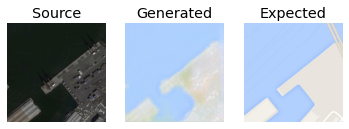

In [73]:
# plot all three images
plot_images(src_images_test, gen_image_test, tar_images_test)

# Testing result from single image

In [62]:
# load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

In [63]:
# load source image
src_image = load_image('E:/gitlab/machine-learning/dataset/maps/satellite.jpg')
print('Loaded', src_image.shape)

Loaded (1, 256, 256, 3)


In [64]:
# load model
model = load_model('model_010960.h5')
# generate image from source
gen_image = model.predict(src_image)

2021-05-09 22:10:05,980 [15536] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


2021-05-09 22:10:53,452 [15536] WARNING  matplotlib.image:716: [JupyterRequire] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


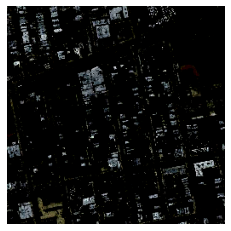

In [66]:
plt.imshow(src_image[0])
plt.axis('off')
plt.show()

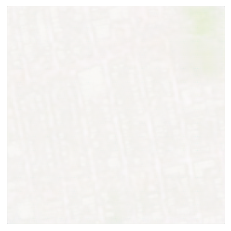

In [67]:
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
plt.imshow(gen_image[0])
plt.axis('off')
plt.show()

# How to Translate Google Maps to Satellite Images

we can develop a Pix2Pix model to translate Google map images to plausible satellite images. This requires that the model invent or hallucinate plausible buildings, roads, parks, and more.

In [96]:
# load all images in a directory into memory
def load_images_test_rev(path, size=(256,512)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        map_img, sat_img = pixels[:, :256], pixels[:, 256:]
        # scale from [0,255] to [-1,1]
        sat_img = (sat_img - 127.5) / 127.5
        map_img = (map_img - 127.5) / 127.5
        # reshape to 1 sample
        sat_img = expand_dims(sat_img, 0)
        map_img = expand_dims(map_img, 0)
    return (sat_img,map_img)

In [81]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		plt.subplot(1, 3, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(images[i])
		# show title
		plt.title(titles[i])
	plt.show()

In [97]:
# dataset path
path = 'E:/gitlab/machine-learning/dataset/maps/test/'
# load dataset
[src_image_test, tar_image_test] = load_images_test_rev(path)
print('Loaded: ', src_image_test.shape, tar_image_test.shape)

Loaded:  (1, 256, 256, 3) (1, 256, 256, 3)


In [77]:
# load model
model = load_model('model_010960.h5')

2021-05-09 22:21:17,403 [15536] WARNING  tensorflow:177: [JupyterRequire] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [98]:
# generate image from source
gen_image_test = model.predict(src_image_test)

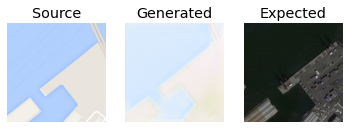

In [99]:
# plot all three images
plot_images(src_image_test, gen_image_test, tar_image_test)